Description

In [ ]:
# NT MEFs 4dpi 
# https://mitprod-my.sharepoint.com/:x:/g/personal/blende_mit_edu/EaPucLekOhVHgGx-1j2jTwMBSLfSb-_jh__x6hMgPUfsGA?e=ma0t1X
# Lenti reporters, retro Cre-RbG

# Import Functions and set directories

In [1]:
import functions_paper_1
import importlib
from functions_paper_1 import *
exec(open("functions_paper_1.py").read())
# Local path to Sharepoint (on your computer, change if you are a different user)
datadir = Path(Path('../datadir_srk.txt').read_text())
figure_folder = './figs_2024_promoter_editing_paper/f_MEF/'

# Import Data ##

In [2]:
#Check to make sure that datadir in "Set Directories" corresponds to the local path on your computer 

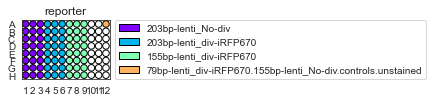

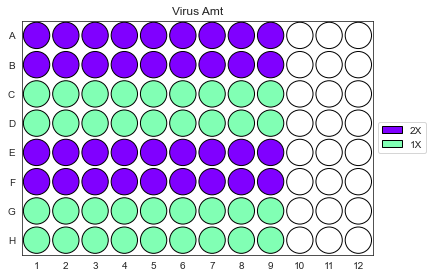

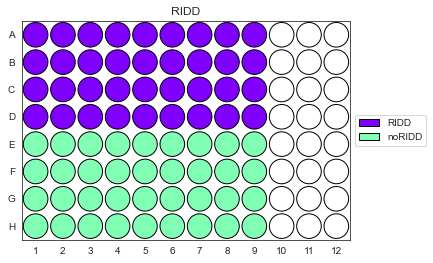

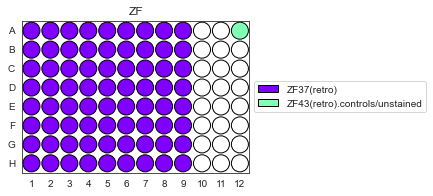

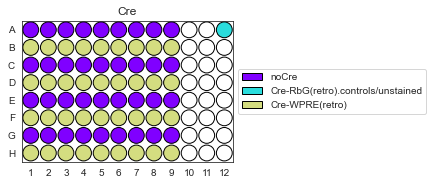

In [3]:
# Import Data 1
folder = '20240415flow_MEFs3dpi'
file_path = datadir/'instruments'/'data'/'attune'/'Sneha'/folder/'export_singlets' #Assign file paths
yaml_path = datadir/'instruments'/'data'/'attune'/'Sneha'/folder/'well_metadata.yaml' #Assign yaml paths 
rd.plot.plot_well_metadata(yaml_path)
data1 = rd.flow.load_csv_with_metadata(file_path, yaml_path) #Pull data
data1['bioreplicate'] = folder 


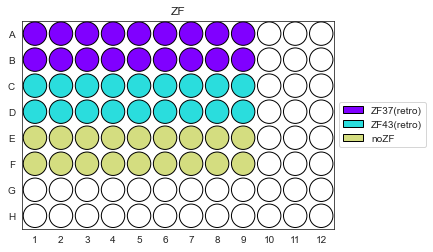

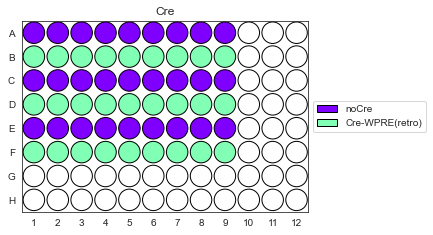

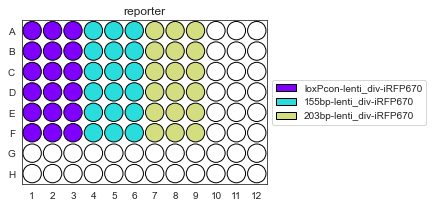

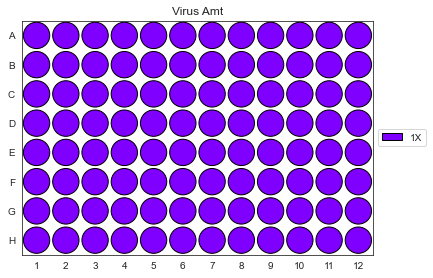

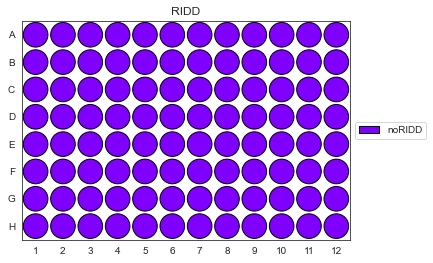

In [4]:
# Import Data 2
folder = '2024.04.22_DIAL_MEFs'
file_path = datadir/'instruments'/'data'/'attune'/'Brittany_attune'/folder/'csv' #Assign file paths
yaml_path = datadir/'instruments'/'data'/'attune'/'Brittany_attune'/folder/'metadata.yaml' #Assign yaml paths 
rd.plot.plot_well_metadata(yaml_path)
data2 = rd.flow.load_csv_with_metadata(file_path, yaml_path) #Pull data
data2['bioreplicate'] = folder 


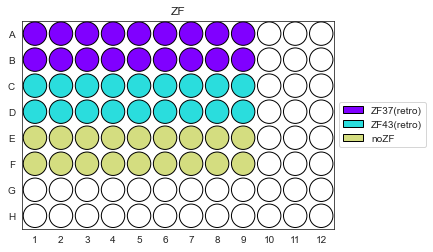

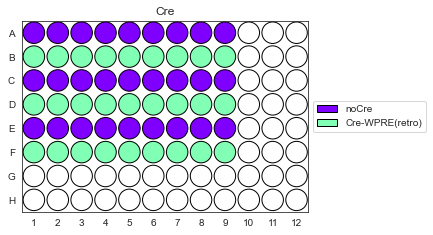

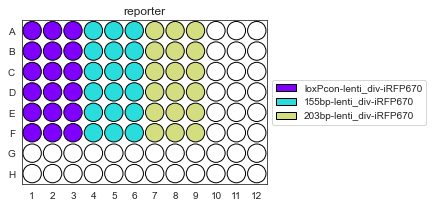

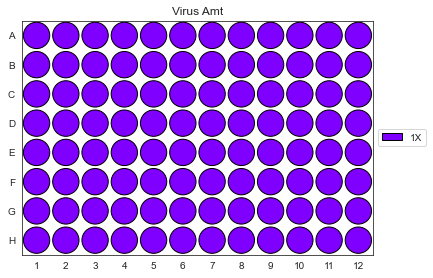

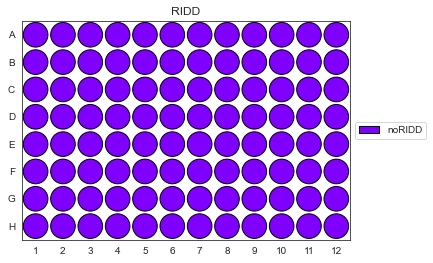

In [5]:
# Import Data 3
folder = '2024.05.13_DIAL_MEFs'
file_path = datadir/'instruments'/'data'/'attune'/'Brittany_attune'/folder/'csv' #Assign file paths
yaml_path = datadir/'instruments'/'data'/'attune'/'Brittany_attune'/folder/'metadata.yaml' #Assign yaml paths 
rd.plot.plot_well_metadata(yaml_path)
data3 = rd.flow.load_csv_with_metadata(file_path, yaml_path) #Pull data
data3['bioreplicate'] = folder 

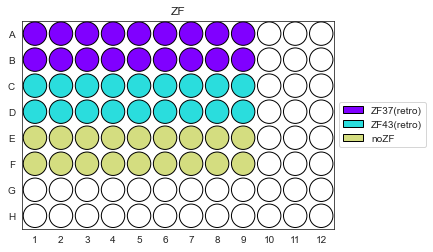

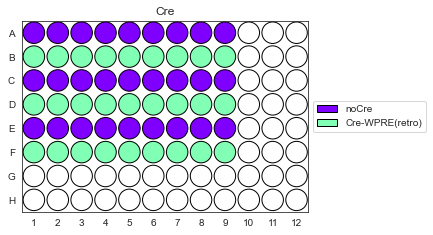

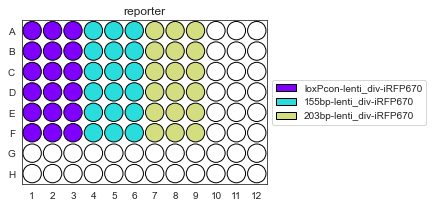

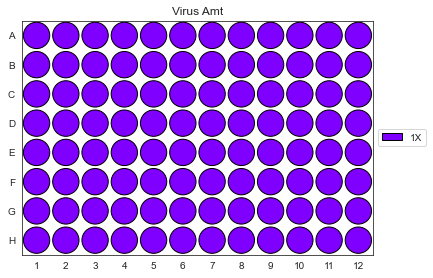

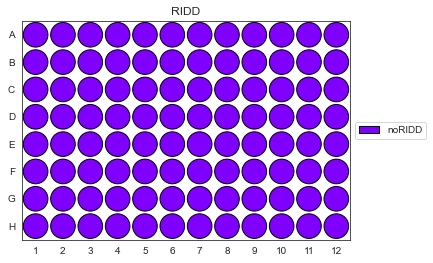

In [6]:
# Import Data 4
folder = '2024.05.20_DIAL_MEFs'
file_path = datadir/'instruments'/'data'/'attune'/'Brittany_attune'/folder/'csv' #Assign file paths
yaml_path = datadir/'instruments'/'data'/'attune'/'Brittany_attune'/folder/'metadata.yaml' #Assign yaml paths 
rd.plot.plot_well_metadata(yaml_path)
data4 = rd.flow.load_csv_with_metadata(file_path, yaml_path) #Pull data
data4['bioreplicate'] = folder 



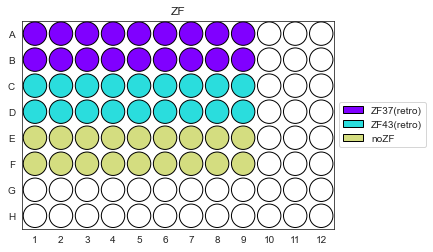

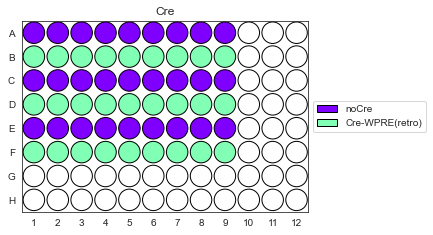

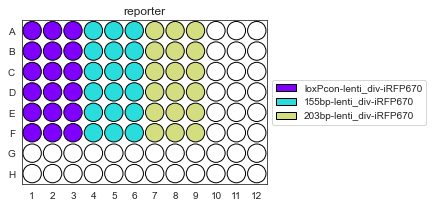

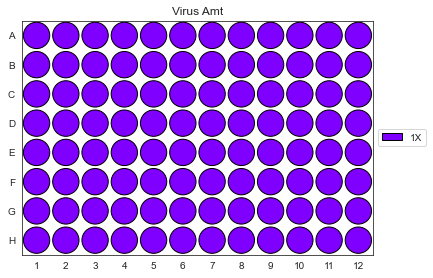

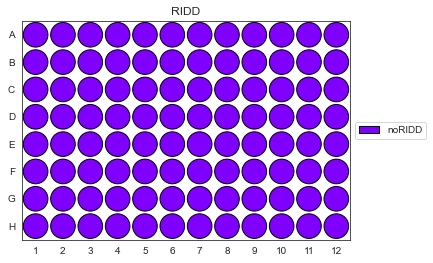

In [7]:
# Import Data 5
folder = '2024.06.03_DIAL_MEFs'
file_path = datadir/'instruments'/'data'/'attune'/'Brittany_attune'/folder/'csv' #Assign file paths
yaml_path = datadir/'instruments'/'data'/'attune'/'Brittany_attune'/folder/'metadata.yaml' #Assign yaml paths 
rd.plot.plot_well_metadata(yaml_path)
data5 = rd.flow.load_csv_with_metadata(file_path, yaml_path) #Pull data
data5['bioreplicate'] = folder 



Concatenate Data, Gate on iRFP670, add conditions

In [8]:
data = pd.concat( [data1, data2, data3, data4, data5], ignore_index=True)
data = data[ data['mCherry-A'] >0]
data = data[ data['mGL-A'] >0]
data = data[ data['TagBFP-A'] >0]
data = data[ data['iRFP670-A'] >0]
#data['log10 mGL-A'] = np.log10(data['mGL-A'])

data['cond'] = data['reporter'] + '-' + data['Virus Amt'] + '.' + data['ZF'] + '.' + data['Cre'] + '.' + data['RIDD']
data['cond2'] = 'ReptAmt-' + data['Virus Amt'] + '.' + data['ZF'] + '.' + data['Cre'] + '.' + data['RIDD']

Repts = { '203bp-lenti_No-div': '203bp_nodiv', '203bp-lenti_div-iRFP670': '203bp',
       '155bp-lenti_div-iRFP670':'155bp', 'loxPcon-lenti_div-iRFP670':'loxPcontrol'}
data['Rept'] = data['reporter'].map(Repts)

display(data.head())
iRFP670_gate = 20000 
mGL_gate = 1500
mCherry_gate = 200
data_iRFP670gated = data[ data['iRFP670-A'] > iRFP670_gate]

,reporter,Virus Amt,RIDD,ZF,Cre,well,population,FSC-A,FSC-H,FSC-W,...,mCherry-H,mCherry-W,Time,bioreplicate,YL1-A,YL1-H,YL1-W,cond,cond2,Rept
0,203bp-lenti_No-div,2X,RIDD,ZF37(retro),noCre,A1,Single Cells,397428.0,229912,104,...,454,0,0.012253,20240415flow_MEFs3dpi,NaN,NaN,NaN,203bp-lenti_No-div-2X.ZF37(retro).noCre.RIDD,ReptAmt-2X.ZF37(retro).noCre.RIDD,203bp_nodiv
1,203bp-lenti_No-div,2X,RIDD,ZF37(retro),noCre,A1,Single Cells,533415.0,283728,119,...,1886,31,0.092919,20240415flow_MEFs3dpi,NaN,NaN,NaN,203bp-lenti_No-div-2X.ZF37(retro).noCre.RIDD,ReptAmt-2X.ZF37(retro).noCre.RIDD,203bp_nodiv
2,203bp-lenti_No-div,2X,RIDD,ZF37(retro),noCre,A1,Single Cells,516932.0,260119,127,...,758,0,0.146016,20240415flow_MEFs3dpi,NaN,NaN,NaN,203bp-lenti_No-div-2X.ZF37(retro).noCre.RIDD,ReptAmt-2X.ZF37(retro).noCre.RIDD,203bp_nodiv
3,203bp-lenti_No-div,2X,RIDD,ZF37(retro),noCre,A1,Single Cells,724083.0,290525,134,...,450,0,0.156226,20240415flow_MEFs3dpi,NaN,NaN,NaN,203bp-lenti_No-div-2X.ZF37(retro).noCre.RIDD,ReptAmt-2X.ZF37(retro).noCre.RIDD,203bp_nodiv
4,203bp-lenti_No-div,2X,RIDD,ZF37(retro),noCre,A1,Single Cells,724696.0,260679,148,...,1477,36,0.215449,20240415flow_MEFs3dpi,NaN,NaN,NaN,203bp-lenti_No-div-2X.ZF37(retro).noCre.RIDD,ReptAmt-2X.ZF37(retro).noCre.RIDD,203bp_nodiv


In [9]:
# Make a list of all the cond. This will be used for the order later on 
repts= pd.unique( data['reporter'])
display(repts)

virus= pd.unique( data2['Virus Amt'])
display(virus)

cond2s= pd.unique( data['cond2'])
display(cond2s)

array(['203bp-lenti_No-div', '203bp-lenti_div-iRFP670',
       '155bp-lenti_div-iRFP670', 'loxPcon-lenti_div-iRFP670'],
      dtype=object)

array(['1X'], dtype=object)

array(['ReptAmt-2X.ZF37(retro).noCre.RIDD',
       'ReptAmt-2X.ZF37(retro).Cre-WPRE(retro).RIDD',
       'ReptAmt-1X.ZF37(retro).noCre.RIDD',
       'ReptAmt-1X.ZF37(retro).Cre-WPRE(retro).RIDD',
       'ReptAmt-2X.ZF37(retro).noCre.noRIDD',
       'ReptAmt-2X.ZF37(retro).Cre-WPRE(retro).noRIDD',
       'ReptAmt-1X.ZF37(retro).noCre.noRIDD',
       'ReptAmt-1X.ZF37(retro).Cre-WPRE(retro).noRIDD',
       'ReptAmt-1X.ZF43(retro).noCre.noRIDD',
       'ReptAmt-1X.ZF43(retro).Cre-WPRE(retro).noRIDD',
       'ReptAmt-1X.noZF.noCre.noRIDD',
       'ReptAmt-1X.noZF.Cre-WPRE(retro).noRIDD'], dtype=object)

# Histograms Ungated and Gated ##

In [ ]:
#set the hue, hue_order, palette 
hue = 'cond2' 
hue_order = pd.array(['ReptAmt-2X.ZF37(retro).noCre.RIDD',
       'ReptAmt-2X.ZF37(retro).Cre-WPRE(retro).RIDD',
       'ReptAmt-1X.ZF37(retro).noCre.RIDD',
       'ReptAmt-1X.ZF37(retro).Cre-WPRE(retro).RIDD',
       'ReptAmt-2X.ZF37(retro).noCre.noRIDD',
       'ReptAmt-2X.ZF37(retro).Cre-WPRE(retro).noRIDD',
       'ReptAmt-1X.ZF37(retro).noCre.noRIDD',
       'ReptAmt-1X.ZF37(retro).Cre-WPRE(retro).noRIDD', 
       'ReptAmt-1X.ZF43(retro).noCre.noRIDD',
       'ReptAmt-1X.ZF43(retro).Cre-WPRE(retro).noRIDD',
       'ReptAmt-1X.noZF.noCre.noRIDD',
       'ReptAmt-1X.noZF.Cre-WPRE(retro).noRIDD'])

palette = 'tab20'

## Ungated 

#Iterate through the different conditions 
for rept in repts: 
    data_now = data[ data['reporter']== rept]
    plottitle = rept + ' NOgateCH'
    g = custom_density_plot(xcat='mGL-A',ycat='mCherry-A', hue=hue, data=data_now, points = 5000, hue_order =hue_order, 
                            plottitle=plottitle, 
                            palette=palette, alpha=0, type = ['contour'], hline=mCherry_gate)
    g.savefig(figure_folder+ plottitle + '.svg',dpi=300,bbox_inches='tight')
    plottitle = rept + ' NOgateBFP'
    g = custom_density_plot(xcat='mGL-A',ycat='TagBFP-A', hue=hue, data=data_now, points = 5000, hue_order =hue_order, 
                            plottitle=plottitle, 
                            palette=palette, alpha=0, type = ['contour'], hline=mCherry_gate)
    g.savefig(figure_folder+ plottitle + '.svg',dpi=300,bbox_inches='tight')
## GATED mCherry-------------
    
data_gate = data[ data['mCherry-A']> mCherry_gate]
#Iterate through the different conditions 
for rept in repts: 
    data_now = data_gate[ data_gate['reporter']== rept]
    plottitle = rept + ' mChGate ' + str(mCherry_gate)
    g = custom_density_plot(xcat='mGL-A',ycat='iRFP670-A', hue=hue, data=data_now, points = 10000, hue_order =hue_order, 
                            plottitle=plottitle, 
                            palette=palette, alpha=0, type = ['contour'], hline=iRFP670_gate)

## GATED mCherry and iRFP670-------------

repts_iRFP = pd.array(['203bp-lenti_div-iRFP670', '155bp-lenti_div-iRFP670', 'loxPcon-lenti_div-iRFP670'])
data_gate = data_gate[ data_gate['iRFP670-A']> iRFP670_gate]
#Iterate through the different conditions 
for rept in repts_iRFP: 
    data_now = data_gate[ data_gate['reporter']== rept]
    plottitle = rept + ' mChGate ' + str(mCherry_gate) + ' 670gate ' + str(iRFP670_gate)
    g = custom_density_plot(xcat='mGL-A',ycat='iRFP670-A', hue=hue, data=data_now, points = 10000, hue_order =hue_order, 
                            plottitle=plottitle, 
                            palette=palette, alpha=0, type = ['contour'], hline=iRFP670_gate)
    
    parameters = pd.array(['mGL-A'])
    hueorder=None
    xsize = 8
    ysize = 1.8
    fontsize = 16.5
    xlim = [1e1, 1e6]
    plottitle = rept + ' mCh_' + str(mCherry_gate) + ' 670_' + str(iRFP670_gate) + '_H'
    g = custom_hist_plot( data_now, parameters, hue=hue, palette=palette, hueorder=hueorder, xsize=xsize, ysize=ysize, title=plottitle, 
                         alpha=0,fontsize=fontsize,
                         legendtitle='Condition', xlim=xlim)
    g = g.get_figure()
    g.savefig(figure_folder+ plottitle + '.svg',dpi=300,bbox_inches='tight')

## Hist For figure

In [ ]:
## Plot just the 1X conditions with no RIDD
parameters = pd.array(['mGL-A'])
xlim = [1e1, 1e6]
#set the hue, hue_order, palette 
repts_iRFP = pd.array(['203bp-lenti_div-iRFP670', '155bp-lenti_div-iRFP670', 'loxPcon-lenti_div-iRFP670'])
hue = 'cond2' 
hue_order = pd.array([
       'ReptAmt-1X.noZF.noCre.noRIDD',
       'ReptAmt-1X.noZF.Cre-WPRE(retro).noRIDD',
       'ReptAmt-1X.ZF43(retro).noCre.noRIDD',
       'ReptAmt-1X.ZF43(retro).Cre-WPRE(retro).noRIDD',
       'ReptAmt-1X.ZF37(retro).noCre.noRIDD',
       'ReptAmt-1X.ZF37(retro).Cre-WPRE(retro).noRIDD',
])

palette = {
       'ReptAmt-1X.noZF.noCre.noRIDD': 'grey',
       'ReptAmt-1X.noZF.Cre-WPRE(retro).noRIDD': 'black', 
       'ReptAmt-1X.ZF43(retro).noCre.noRIDD':'deepskyblue',
       'ReptAmt-1X.ZF43(retro).Cre-WPRE(retro).noRIDD':'blue',
       'ReptAmt-1X.ZF37(retro).noCre.noRIDD': 'darksalmon',
       'ReptAmt-1X.ZF37(retro).Cre-WPRE(retro).noRIDD': 'red'}

data_fig = data[ data['cond2'].isin(hue_order)]
data_fig = data_fig[ data_fig['reporter'].isin(repts_iRFP)]

# ## Ungated 

#Iterate through the different conditions 
for rept in repts_iRFP: 
    data_now = data_fig[ data_fig['reporter']== rept]
    plottitle = rept + ' ungated'
#     g = custom_density_plot(xcat='mGL-A',ycat='iRFP670-A', hue=hue, data=data_now, points = 10000, hue_order =hue_order, 
#                             plottitle=plottitle, 
#                             palette=palette, alpha=0, type = ['contour'], hline=iRFP670_gate)
#     g.savefig(figure_folder+ plottitle + '.svg',dpi=300,bbox_inches='tight')
    xsize = 4
    ysize = 1.8
    fontsize = 16.5
    plottitle = plottitle + '_H'
    g = plt.figure(figsize=[xsize,ysize])
    g = custom_hist_plot( data_now, parameters, hue=hue, palette=palette, hueorder=hue_order, xsize=xsize, ysize=ysize, title=plottitle, 
                         alpha=0.1,fontsize=fontsize, line=mGL_gate,
                         legendtitle='Condition', xlim=xlim)
    g = g.get_figure()
    g.savefig(figure_folder+ plottitle + '.svg',dpi=300,bbox_inches='tight')


## GATED iRFP670-------------
data_gate = data_fig[ data_fig['iRFP670-A']> iRFP670_gate]
#Iterate through the different conditions 
for rept in repts_iRFP: 
    data_now = data_gate[ data_gate['reporter']== rept]
    # plottitle = rept + ' 670Gate ' + str(iRFP670_gate)
    # g = custom_density_plot(xcat='mGL-A',ycat='iRFP670-A', hue=hue, data=data_now, 
    #                         points = 10000, hue_order =hue_order, 
    #                         plottitle=plottitle, 
    #                         palette=palette, alpha=0, type = ['contour'], hline=iRFP670_gate)
    # g.savefig(figure_folder+ plottitle + '.svg',dpi=300,bbox_inches='tight')

    # plottitle = rept + ' 670Gate BFP' 
    # g = custom_density_plot(xcat='mGL-A',ycat='TagBFP-A', hue=hue, data=data_now, 
    #                         points = 10000, hue_order =hue_order, 
    #                         plottitle=plottitle, 
    #                         palette=palette, alpha=0, type = ['contour'], hline=iRFP670_gate)
    # g.savefig(figure_folder+ plottitle + '.svg',dpi=300,bbox_inches='tight')

    plottitle = rept + ' 670Gate mCH' 
    g = custom_density_plot(xcat='mGL-A',ycat='mCherry-A', hue=hue, data=data_now,
                             points = 10000, hue_order =hue_order, 
                            plottitle=plottitle, 
                            palette=palette, alpha=0, type = ['contour'], hline=800)
    g.savefig(figure_folder+ plottitle + '.svg',dpi=300,bbox_inches='tight')


    parameters = pd.array(['mGL-A'])
    hueorder=None
    xsize = 4
    ysize = 1.8
    fontsize = 16.5
    xlim = [1e1, 1e6]
    plottitle = rept + ' 670_' + str(iRFP670_gate) + '_H'
    g = plt.figure(figsize=[xsize,ysize])
    g = custom_hist_plot( data_now, parameters, hue=hue, palette=palette, hueorder=hueorder, xsize=xsize, ysize=ysize, title=plottitle, 
                         alpha=0.1,fontsize=fontsize,
                         legendtitle='Condition', xlim=xlim, line=mGL_gate)
    g = g.get_figure()
    g.savefig(figure_folder+ plottitle + '.svg',dpi=300,bbox_inches='tight')

    data_now_ZF37 =data_now[ data_now['ZF']!='ZF43(retro)']
    plottitle = plottitle + '_H ZF37only'
    g = plt.figure(figsize=[xsize,ysize])
    g = custom_hist_plot( data_now_ZF37, parameters, hue=hue, palette=palette, hueorder=hueorder, xsize=xsize, ysize=ysize, title=plottitle, 
                         alpha=0.1, line=mGL_gate,
                         legendtitle='Condition', xlim=xlim)
    g = g.get_figure()
    g.savefig(figure_folder+ plottitle + '.svg',dpi=300,bbox_inches='tight')

    data_now_ZF43 = data_now[ data_now['ZF']!='ZF37(retro)']
    plottitle = plottitle + '_H ZF43only'
    g = plt.figure(figsize=[xsize,ysize])
    g = custom_hist_plot( data_now_ZF43, parameters, hue=hue, palette=palette, hueorder=hueorder, xsize=xsize, ysize=ysize, title=plottitle, 
                         alpha=0.1, line=mGL_gate,
                         legendtitle='Condition', xlim=xlim)
    g = g.get_figure()
    g.savefig(figure_folder+ plottitle + '.svg',dpi=300,bbox_inches='tight')

#---------------------------
#ZF37 is gated on mCherry positive, but also no ZF condtion is there 
data_gate = data_fig[ data_fig['iRFP670-A']> iRFP670_gate]
data_noZF = data_gate[ (data_gate['ZF']=='noZF') & data_gate['reporter']=='203bp-lenti_div-iRFP670' ]
data_ZF37 = data_now[ (data_now['ZF']=='ZF37(retro)') & data_now['mCherry-A']>800 
                     & data_gate['reporter']=='203bp-lenti_div-iRFP670']
data_now = pd.concat( [data_noZF, data_ZF37])
plottitle =  'ZF37_H mCherry'
g = plt.figure(figsize=[xsize,ysize])
g = custom_hist_plot( data_now, parameters, hue=hue, palette=palette, hueorder=hueorder, xsize=xsize, ysize=ysize, title=plottitle, 
                        alpha=0.1, line=mGL_gate,
                        legendtitle='Condition', xlim=xlim)
g = g.get_figure()
g.savefig(figure_folder+ plottitle + '.svg',dpi=300,bbox_inches='tight')




## GATED iRFP670 and mGL------------
data_gate = data_gate[ data_gate['mGL-A']> mGL_gate]
data_gate = data_gate[ data_gate['ZF']!= 'noZF'] #take out the noZF condition
#Iterate through the different conditions 
for rept in repts_iRFP: 
    data_now = data_gate[ data_gate['reporter']== rept]
    plottitle = rept + ' 670_' + str(iRFP670_gate) + ' mGL_' + str(mGL_gate)
    # g = custom_density_plot(xcat='mGL-A',ycat='iRFP670-A', hue=hue, data=data_now, points = 10000, hue_order =hue_order, 
    #                         plottitle=plottitle, 
    #                         palette=palette, alpha=0, type = ['contour'], hline=iRFP670_gate)
    # g.savefig(figure_folder+ plottitle + '.svg',dpi=300,bbox_inches='tight')
    
    
    parameters = pd.array(['mGL-A'])
    hueorder=None
    xsize = 2.5/1.5
    ysize = 1.5/1.5
    xlim = [1e1, 1e6]
    plottitle = plottitle + '_H'
    g = plt.figure(figsize=[xsize,ysize])
    g = custom_hist_plot( data_now, parameters, hue=hue, palette=palette, hueorder=hueorder, xsize=xsize, ysize=ysize, title=plottitle, 
                         alpha=0.1, line=mGL_gate,
                         legendtitle='Condition', xlim=xlim)
    g = g.get_figure()
    g.savefig(figure_folder+ plottitle + '.svg',dpi=300,bbox_inches='tight')

    
    data_now_ZF37 =data_now[ data_now['ZF']!='ZF43(retro)']
    plottitle = plottitle + '_H ZF37only'
    g = plt.figure(figsize=[xsize,ysize])
    g = custom_hist_plot( data_now_ZF37, parameters, hue=hue, palette=palette, hueorder=hueorder, xsize=xsize, ysize=ysize, title=plottitle, 
                         alpha=0.1, line=mGL_gate,
                         legendtitle='Condition', xlim=xlim)
    g = g.get_figure()
    g.savefig(figure_folder+ plottitle + '.svg',dpi=300,bbox_inches='tight')

    data_now_ZF43 = data_now[ data_now['ZF']!='ZF37(retro)']
    plottitle = plottitle + '_H ZF43only'
    g = plt.figure(figsize=[xsize,ysize])
    g = custom_hist_plot( data_now_ZF43, parameters, hue=hue, palette=palette, hueorder=hueorder, xsize=xsize, ysize=ysize, title=plottitle, 
                         alpha=0.1, line=mGL_gate,
                         legendtitle='Condition', xlim=xlim)
    g = g.get_figure()
    g.savefig(figure_folder+ plottitle + '.svg',dpi=300,bbox_inches='tight')

## 203bp and 155bp histograms for figure -- gated mCherry for ZF37

In [ ]:

## Plot just the 1X conditions with no RIDD
parameters = pd.array(['mGL-A'])
xlim = [1e1, 1e6]
#set the hue, hue_order, palette 
repts_iRFP = pd.array(['203bp-lenti_div-iRFP670', '155bp-lenti_div-iRFP670', 'loxPcon-lenti_div-iRFP670'])
hue = 'cond2' 
hue_order = pd.array([
       'ReptAmt-1X.noZF.noCre.noRIDD',
       'ReptAmt-1X.noZF.Cre-WPRE(retro).noRIDD',
       'ReptAmt-1X.ZF43(retro).noCre.noRIDD',
       'ReptAmt-1X.ZF43(retro).Cre-WPRE(retro).noRIDD',
       'ReptAmt-1X.ZF37(retro).noCre.noRIDD',
       'ReptAmt-1X.ZF37(retro).Cre-WPRE(retro).noRIDD',
])
hueorder=hue_order

palette = {
       'ReptAmt-1X.noZF.noCre.noRIDD': 'grey',
       'ReptAmt-1X.noZF.Cre-WPRE(retro).noRIDD': 'black', 
       'ReptAmt-1X.ZF43(retro).noCre.noRIDD':'deepskyblue',
       'ReptAmt-1X.ZF43(retro).Cre-WPRE(retro).noRIDD':'blue',
       'ReptAmt-1X.ZF37(retro).noCre.noRIDD': 'darksalmon',
       'ReptAmt-1X.ZF37(retro).Cre-WPRE(retro).noRIDD': 'red'}

data_fig = data[ data['cond2'].isin(hue_order)]
data_fig = data_fig[ data_fig['reporter'].isin(repts_iRFP)]


xsize =2; ysize = 1.5
fontsize = 11

#203bp 
data_gate = data_fig[ data_fig['iRFP670-A']> iRFP670_gate]
data_noZF = data_gate[ (data_gate['ZF']=='noZF') & (data_gate['reporter']=='203bp-lenti_div-iRFP670') ]
data_ZF37 = data_gate[ (data_gate['ZF']=='ZF37(retro)') & (data_gate['mCherry-A']>800) 
                     & (data_gate['reporter']=='203bp-lenti_div-iRFP670')]
data_ZF43 = data_gate[ (data_gate['ZF']=='ZF43(retro)') & (data_gate['TagBFP-A']>800) 
                     & (data_gate['reporter']=='203bp-lenti_div-iRFP670')]
#ZF37
data_now = pd.concat( [data_noZF, data_ZF37])
plottitle =  '203bp ZF37_H mCherry'
g = plt.figure(figsize=[xsize,ysize])
g = custom_hist_plot( data_now, parameters, hue=hue, palette=palette, hueorder=hueorder, 
                     xsize=xsize, ysize=ysize, title=plottitle, 
                        alpha=0.1, fontsize=fontsize, legend=False,
                        legendtitle='Condition', xlim=xlim)
g = g.get_figure()
g.savefig(figure_folder+ plottitle + '.svg',dpi=300,bbox_inches='tight')
#ZF43
data_now = pd.concat( [data_noZF, data_ZF43])
plottitle =  '203bp ZF43_H TagBFP'
g = plt.figure(figsize=[xsize,ysize])
g = custom_hist_plot( data_now, parameters, hue=hue, palette=palette, hueorder=hueorder, xsize=xsize, ysize=ysize, title=plottitle, 
                        alpha=0.1, fontsize=fontsize, legend=False,
                        legendtitle='Condition', xlim=xlim)
g = g.get_figure()
g.savefig(figure_folder+ plottitle + '.svg',dpi=300,bbox_inches='tight')


#155bp 
data_gate = data_fig[ data_fig['iRFP670-A']> iRFP670_gate]
data_noZF = data_gate[ (data_gate['ZF']=='noZF') & (data_gate['reporter']=='155bp-lenti_div-iRFP670') ]
data_ZF37 = data_gate[ (data_gate['ZF']=='ZF37(retro)') & (data_gate['mCherry-A']>800) 
                     & (data_gate['reporter']=='155bp-lenti_div-iRFP670')]
data_ZF43 = data_gate[ (data_gate['ZF']=='ZF43(retro)') & (data_gate['TagBFP-A']>800) 
                     & (data_gate['reporter']=='155bp-lenti_div-iRFP670')]
#ZF37
data_now = pd.concat( [data_noZF, data_ZF37])
plottitle =  '155bp ZF37_H mCherry'
g = plt.figure(figsize=[xsize,ysize])
g = custom_hist_plot( data_now, parameters, hue=hue, palette=palette, hueorder=hueorder, 
                     xsize=xsize, ysize=ysize, title=plottitle, 
                        alpha=0.1, fontsize=fontsize, legend=False,
                        legendtitle='Condition', xlim=xlim)
g = g.get_figure()
g.savefig(figure_folder+ plottitle + '.svg',dpi=300,bbox_inches='tight')
#ZF43
data_now = pd.concat( [data_noZF, data_ZF43])
plottitle =  '155bp ZF43_H mCherry'
g = plt.figure(figsize=[xsize,ysize])
g = custom_hist_plot( data_now, parameters, hue=hue, palette=palette, hueorder=hueorder, xsize=xsize, ysize=ysize, title=plottitle, 
                        alpha=0.1, fontsize=fontsize, legend=False,
                        legendtitle='Condition', xlim=xlim)
g = g.get_figure()
g.savefig(figure_folder+ plottitle + '.svg',dpi=300,bbox_inches='tight')

## Hist for figure just 1D plots, GREEN color 

In [ ]:
## Plot just the 1X conditions with no RIDD
parameters = pd.array(['mGL-A'])
xlim = [1e1, 1e6]
#set the hue, hue_order, palette 
repts_iRFP = pd.array(['203bp-lenti_div-iRFP670', '155bp-lenti_div-iRFP670', 'loxPcon-lenti_div-iRFP670'])
hue = 'cond2' 
hue_order = pd.array([
       'ReptAmt-1X.noZF.noCre.noRIDD',
       'ReptAmt-1X.noZF.Cre-WPRE(retro).noRIDD',
       'ReptAmt-1X.ZF43(retro).noCre.noRIDD',
       'ReptAmt-1X.ZF43(retro).Cre-WPRE(retro).noRIDD',
       'ReptAmt-1X.ZF37(retro).noCre.noRIDD',
       'ReptAmt-1X.ZF37(retro).Cre-WPRE(retro).noRIDD',
])

palette = {
       'ReptAmt-1X.noZF.noCre.noRIDD': 'grey',
       'ReptAmt-1X.noZF.Cre-WPRE(retro).noRIDD': 'black', 
       'ReptAmt-1X.ZF43(retro).noCre.noRIDD':'deepskyblue',
       'ReptAmt-1X.ZF43(retro).Cre-WPRE(retro).noRIDD':'blue',
       'ReptAmt-1X.ZF37(retro).noCre.noRIDD': 'darksalmon',
       'ReptAmt-1X.ZF37(retro).Cre-WPRE(retro).noRIDD': 'red'}
green = 'no'

# palette = {
#        'ReptAmt-1X.noZF.noCre.noRIDD': 'grey',
#        'ReptAmt-1X.noZF.Cre-WPRE(retro).noRIDD': 'black', 
#        'ReptAmt-1X.ZF43(retro).noCre.noRIDD':'#C3DB9A',
#        'ReptAmt-1X.ZF43(retro).Cre-WPRE(retro).noRIDD':'#69B645',
#        'ReptAmt-1X.ZF37(retro).noCre.noRIDD': '#C3DB9A',
#        'ReptAmt-1X.ZF37(retro).Cre-WPRE(retro).noRIDD': '#69B645'}
# green= 'yes'

data_fig = data[ data['cond2'].isin(hue_order)]
data_fig = data_fig[ data_fig['reporter'].isin(repts_iRFP)]

xlim = False

# ## Ungated 

#Iterate through the different conditions 
for rept in repts_iRFP: 
    data_now = data_fig[ data_fig['reporter']== rept]
    plottitle = rept + ' ungated'
#     g = custom_density_plot(xcat='mGL-A',ycat='iRFP670-A', hue=hue, data=data_now, points = 10000, hue_order =hue_order, 
#                             plottitle=plottitle, 
#                             palette=palette, alpha=0, type = ['contour'], hline=iRFP670_gate)
#     g.savefig(figure_folder+ plottitle + '.svg',dpi=300,bbox_inches='tight')
    xsize = 4
    ysize = 1.8
    fontsize = 16.5
    plottitle = plottitle + '_H'
    g = plt.figure(figsize=[xsize,ysize])
    g = custom_hist_plot( data_now, parameters, hue=hue, palette=palette, hueorder=hue_order, xsize=xsize, ysize=ysize, title=plottitle, 
                         alpha=0.1,fontsize=fontsize, line=mGL_gate,
                         legendtitle='Condition', xlim=xlim)
    g = g.get_figure()
    g.savefig(figure_folder+ plottitle + '.svg',dpi=300,bbox_inches='tight')
## GATED iRFP670-------------
data_gate = data_fig[ data_fig['iRFP670-A']> iRFP670_gate]
#Iterate through the different conditions 
for rept in repts_iRFP: 
    data_now = data_gate[ data_gate['reporter']== rept]
    parameters = pd.array(['mGL-A'])
    hueorder=None
    #xsize = 4
    #ysize = 1.8
    #fontsize = 16.5
    xsize =  2.5/1.5
    ysize = 1.5/1.5
    fontsize = None
    xlim = [1e1, 1e6]
    plottitle = rept + ' 670_' + str(iRFP670_gate) + '_H green-' + green
    g = plt.figure(figsize=[xsize,ysize])
    g = custom_hist_plot( data_now, parameters, hue=hue, palette=palette, hueorder=hueorder, xsize=xsize, ysize=ysize, title=plottitle, 
                         alpha=0.1,fontsize=fontsize,
                         legendtitle='Condition', xlim=xlim, line=mGL_gate)
    g = g.get_figure()
    g.savefig(figure_folder+ plottitle + '.svg',dpi=300,bbox_inches='tight')

    data_now_ZF37 =data_now[ data_now['ZF']=='ZF37(retro)']
    plottitle37 = plottitle + '37only'
    g = plt.figure(figsize=[xsize,ysize])
    g = custom_hist_plot( data_now_ZF37, parameters, hue=hue, palette=palette, hueorder=hueorder, xsize=xsize, ysize=ysize, title=plottitle37, 
                         alpha=0.1, line=mGL_gate,
                         legendtitle='Condition', xlim=xlim)
    g = g.get_figure()
    g.savefig(figure_folder+ plottitle37 + '.svg',dpi=300,bbox_inches='tight')

    data_now_ZF43 = data_now[ data_now['ZF']=='ZF43(retro)']
    plottitle43 = plottitle + 'ZF43only'
    g = plt.figure(figsize=[xsize,ysize])
    g = custom_hist_plot( data_now_ZF43, parameters, hue=hue, palette=palette, hueorder=hueorder, xsize=xsize, ysize=ysize, title=plottitle43, 
                         alpha=0.1, line=mGL_gate,
                         legendtitle='Condition', xlim=xlim)
    g = g.get_figure()
    g.savefig(figure_folder+ plottitle43 + '.svg',dpi=300,bbox_inches='tight')

    data_now_noZF = data_now[ data_now['ZF']=='noZF']
    plottitle_noZF = plottitle + 'noZFonly'
    g = plt.figure(figsize=[xsize,ysize])
    g = custom_hist_plot( data_now_noZF, parameters, hue=hue, palette=palette, hueorder=hueorder, xsize=xsize, ysize=ysize, title=plottitle_noZF, 
                         alpha=0.1, line=mGL_gate,
                         legendtitle='Condition', xlim=xlim)
    g = g.get_figure()
    g.savefig(figure_folder+ plottitle43 + '.svg',dpi=300,bbox_inches='tight')

    data_now_ZF37 =data_now[ data_now['ZF']!='ZF43(retro)']
    plottitle37 = plottitle + 'no43'
    g = plt.figure(figsize=[xsize,ysize])
    g = custom_hist_plot( data_now_ZF37, parameters, hue=hue, palette=palette, hueorder=hueorder, xsize=xsize, ysize=ysize, title=plottitle, 
                         alpha=0.1, line=mGL_gate,
                         legendtitle='Condition', xlim=xlim)
    g = g.get_figure()
    g.savefig(figure_folder+ plottitle37 + '.svg',dpi=300,bbox_inches='tight')

    data_now_ZF43 = data_now[ data_now['ZF']!='ZF37(retro)']
    plottitle43 = plottitle + 'no37'
    g = plt.figure(figsize=[xsize,ysize])
    g = custom_hist_plot( data_now_ZF43, parameters, hue=hue, palette=palette, hueorder=hueorder, xsize=xsize, ysize=ysize, title=plottitle, 
                         alpha=0.1, line=mGL_gate,
                         legendtitle='Condition', xlim=xlim)
    g = g.get_figure()
    g.savefig(figure_folder+ plottitle43 + '.svg',dpi=300,bbox_inches='tight')

## GATED iRFP670 and mGL------------
data_gate = data_gate[ data_gate['mGL-A']> mGL_gate]
data_gate = data_gate[ data_gate['ZF']!= 'noZF'] #take out the noZF condition
#Iterate through the different conditions 
for rept in repts_iRFP: 
    data_now = data_gate[ data_gate['reporter']== rept]

    parameters = pd.array(['mGL-A'])
    hueorder=None
    # xsize = 2.5/1.5
    # ysize = 1.5/1.5
    # xlim = [1e1, 1e6]
    xsize =  2.5/1.5
    ysize = 1.5/1.5
    xlim = False
    fontsize = None
    plottitle = 'Gated iRFP mGL_H green-' + green
    g = plt.figure(figsize=[xsize,ysize])
    g = custom_hist_plot( data_now, parameters, hue=hue, palette=palette, hueorder=hueorder, 
                         xsize=xsize, ysize=ysize, title=plottitle, 
                         alpha=0.1, line=mGL_gate,
                         legendtitle='Condition', xlim=xlim)
    g = g.get_figure()
    g.savefig(figure_folder+ plottitle + '.svg',dpi=300,bbox_inches='tight')

    plottitle_hold= plottitle
    data_now_ZF37 =data_now[ data_now['ZF']=='ZF37(retro)']
    plottitle = plottitle_hold + 'ZF37only'
    g = plt.figure(figsize=[xsize,ysize])
    g = custom_hist_plot( data_now_ZF37, parameters, hue=hue, palette=palette, hueorder=hueorder, xsize=xsize, ysize=ysize, title=plottitle, 
                         alpha=0.1, line=mGL_gate,
                         legendtitle='Condition', xlim=xlim)
    g = g.get_figure()
    g.savefig(figure_folder+ plottitle + '.svg',dpi=300,bbox_inches='tight')

    data_now_ZF37 =data_now[ data_now['ZF']!='ZF43(retro)']
    plottitle = plottitle_hold + 'no43'
    g = plt.figure(figsize=[xsize,ysize])
    g = custom_hist_plot( data_now_ZF37, parameters, hue=hue, palette=palette, hueorder=hueorder, xsize=xsize, ysize=ysize, title=plottitle, 
                         alpha=0.1, line=mGL_gate,
                         legendtitle='Condition', xlim=xlim)
    g = g.get_figure()
    g.savefig(figure_folder+ plottitle + '.svg',dpi=300,bbox_inches='tight')

    data_now_ZF43 = data_now[ data_now['ZF']!='ZF37(retro)']
    plottitle = plottitle_hold + 'ZF43only'
    g = plt.figure(figsize=[xsize,ysize])
    g = custom_hist_plot( data_now_ZF43, parameters, hue=hue, palette=palette, hueorder=hueorder, xsize=xsize, ysize=ysize, title=plottitle, 
                         alpha=0.1, line=mGL_gate,
                         legendtitle='Condition', xlim=xlim)
    g = g.get_figure()
    g.savefig(figure_folder+ plottitle + '.svg',dpi=300,bbox_inches='tight')

# Summary Plots ##

## Calculate Summary Stats**

In [10]:
#iRFP670 gated
data_gate = data[ data['iRFP670-A']> iRFP670_gate]
df = data_gate #choose dataframe
#Decide how to group. The last parameter will be the condition that it is group by by last ('well' or 'bioreplicate')
by = ['reporter', 'Rept', 'ZF', 'Cre', 'Virus Amt', 'RIDD', 'cond', 'cond2','bioreplicate', 'well'] #how to filter results, columns 
x = ['mGL-A', 'TagBFP-A','mCherry-A','iRFP670-A'] #which parameter to calculate results on
stat = [sp.stats.gmean, np.median, np.std, np.mean] #statistics to calculate
s_well_iRFPgated = calc_stats(df,by,x,stat) #calculate statistics 
by = ['reporter', 'ZF', 'Rept','Cre', 'Virus Amt', 'RIDD', 'cond', 'cond2','bioreplicate'] #how to filter results, columns 
s_bioreplicate_iRFPgated = calc_stats(df,by,x,stat)

#iRFP670 gated and mGL gated
data_gate = data_gate[ data_gate['mGL-A']> mGL_gate]
df = data_gate #choose dataframe
#Decide how to group. The last parameter will be the condition that it is group by by last ('well' or 'bioreplicate')
by = ['reporter', 'Rept','ZF', 'Cre', 'Virus Amt', 'RIDD', 'cond', 'cond2','bioreplicate', 'well'] #how to filter results, columns 
s_well_iRFPgated_mGLgated = calc_stats(df,by,x,stat) #calculate statistics 
by = ['reporter', 'Rept','ZF', 'Cre', 'Virus Amt', 'RIDD', 'cond', 'cond2','bioreplicate'] #how to filter results, columns 
s_bioreplicate_iRFPgated_mGLgated = calc_stats(df,by,x,stat)

#iRFP670 gated and mCherry
mCherry_gate=800
data_gate = data[ (data['mCherry-A']>mCherry_gate) & (data['iRFP670-A']> iRFP670_gate)]
df = data_gate #choose dataframe
#Decide how to group. The last parameter will be the condition that it is group by by last ('well' or 'bioreplicate')
by = ['reporter', 'Rept','ZF', 'Cre', 'Virus Amt', 'RIDD', 'cond', 'cond2','bioreplicate', 'well'] #how to filter results, columns 
s_well_iRFPgated_mCherrygated = calc_stats(df,by,x,stat) #calculate statistics 
by = ['reporter', 'Rept','ZF', 'Cre', 'Virus Amt', 'RIDD', 'cond', 'cond2','bioreplicate'] #how to filter results, columns 
s_bioreplicate_iRFPgated_mCherrygated = calc_stats(df,by,x,stat)

#iRFP670 gated and TagBFP
TagBFP_gate=800
data_gate = data[ (data['TagBFP-A']>TagBFP_gate) & (data['iRFP670-A']> iRFP670_gate)]
df = data_gate #choose dataframe
#Decide how to group. The last parameter will be the condition that it is group by by last ('well' or 'bioreplicate')
by = ['reporter', 'Rept','ZF', 'Cre', 'Virus Amt', 'RIDD', 'cond', 'cond2','bioreplicate', 'well'] #how to filter results, columns 
s_well_iRFPgated_TagBFP = calc_stats(df,by,x,stat) #calculate statistics 
by = ['reporter', 'Rept','ZF', 'Cre', 'Virus Amt', 'RIDD', 'cond', 'cond2','bioreplicate'] #how to filter results, columns 
s_bioreplicate_iRFPgated_TagBFP = calc_stats(df,by,x,stat)

## Plot Summary Plot, all reporters 1X Well mGL+**

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

203bp_ReptAmt-1X.ZF37(retro).noCre.noRIDD v.s. 203bp_ReptAmt-1X.ZF37(retro).Cre-WPRE(retro).noRIDD: t-test independent samples, P_val=1.160e-18 stat=-2.178e+01
155bp_ReptAmt-1X.ZF37(retro).noCre.noRIDD v.s. 155bp_ReptAmt-1X.ZF37(retro).Cre-WPRE(retro).noRIDD: t-test independent samples, P_val=6.262e-12 stat=-1.128e+01
loxPcontrol_ReptAmt-1X.ZF37(retro).noCre.noRIDD v.s. loxPcontrol_ReptAmt-1X.ZF37(retro).Cre-WPRE(retro).noRIDD: t-test independent samples, P_val=7.215e-01 stat=-3.611e-01
203bp_ReptAmt-1X.ZF43(retro).noCre.noRIDD v.s. 203bp_ReptAmt-1X.ZF43(retro).Cre-WPRE(retro).noRIDD: t-test independent samples, P_val=5.645e-11 stat=-1.217e+01
155bp_ReptAmt-1X.ZF43(retro).noCre.noRIDD v.s. 155bp_ReptAmt-1X.ZF43(retro).Cre-WPRE(retro).noRIDD: t-test independent samples, P_val=4.741e-06 stat=-6.194e+00
loxPcontrol_ReptAmt-1X.Z

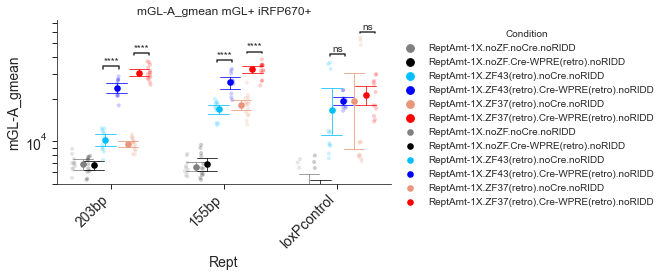

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

203bp_ReptAmt-1X.ZF37(retro).noCre.noRIDD v.s. 203bp_ReptAmt-1X.ZF37(retro).Cre-WPRE(retro).noRIDD: t-test independent samples, P_val=9.368e-01 stat=-7.998e-02
155bp_ReptAmt-1X.ZF37(retro).noCre.noRIDD v.s. 155bp_ReptAmt-1X.ZF37(retro).Cre-WPRE(retro).noRIDD: t-test independent samples, P_val=1.360e-01 stat=-1.535e+00
loxPcontrol_ReptAmt-1X.ZF37(retro).noCre.noRIDD v.s. loxPcontrol_ReptAmt-1X.ZF37(retro).Cre-WPRE(retro).noRIDD: t-test independent samples, P_val=2.329e-01 stat=-1.227e+00
203bp_ReptAmt-1X.ZF43(retro).noCre.noRIDD v.s. 203bp_ReptAmt-1X.ZF43(retro).Cre-WPRE(retro).noRIDD: t-test independent samples, P_val=7.043e-04 stat=3.966e+00
155bp_ReptAmt-1X.ZF43(retro).noCre.noRIDD v.s. 155bp_ReptAmt-1X.ZF43(retro).Cre-WPRE(retro).noRIDD: t-test independent samples, P_val=1.944e-03 stat=3.564e+00
loxPcontrol_ReptAmt-1X.ZF4

<Figure size 432x288 with 0 Axes>

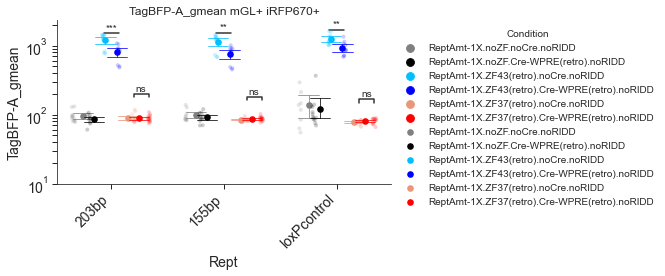

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

203bp_ReptAmt-1X.ZF37(retro).noCre.noRIDD v.s. 203bp_ReptAmt-1X.ZF37(retro).Cre-WPRE(retro).noRIDD: t-test independent samples, P_val=1.478e-02 stat=2.605e+00
155bp_ReptAmt-1X.ZF37(retro).noCre.noRIDD v.s. 155bp_ReptAmt-1X.ZF37(retro).Cre-WPRE(retro).noRIDD: t-test independent samples, P_val=3.932e-02 stat=2.162e+00
loxPcontrol_ReptAmt-1X.ZF37(retro).noCre.noRIDD v.s. loxPcontrol_ReptAmt-1X.ZF37(retro).Cre-WPRE(retro).noRIDD: t-test independent samples, P_val=1.329e-01 stat=1.560e+00
203bp_ReptAmt-1X.ZF43(retro).noCre.noRIDD v.s. 203bp_ReptAmt-1X.ZF43(retro).Cre-WPRE(retro).noRIDD: t-test independent samples, P_val=4.385e-01 stat=7.897e-01
155bp_ReptAmt-1X.ZF43(retro).noCre.noRIDD v.s. 155bp_ReptAmt-1X.ZF43(retro).Cre-WPRE(retro).noRIDD: t-test independent samples, P_val=6.574e-01 stat=4.503e-01
loxPcontrol_ReptAmt-1X.ZF43(r

<Figure size 432x288 with 0 Axes>

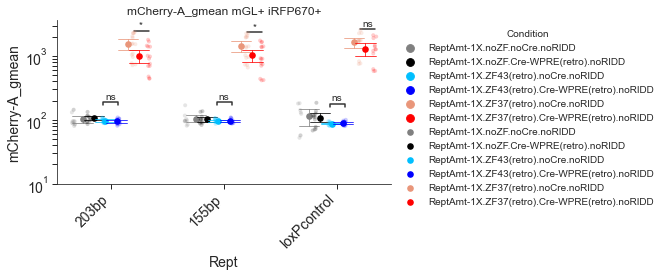

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

203bp_ReptAmt-1X.ZF37(retro).noCre.noRIDD v.s. 203bp_ReptAmt-1X.ZF37(retro).Cre-WPRE(retro).noRIDD: t-test independent samples, P_val=4.599e-02 stat=2.092e+00
155bp_ReptAmt-1X.ZF37(retro).noCre.noRIDD v.s. 155bp_ReptAmt-1X.ZF37(retro).Cre-WPRE(retro).noRIDD: t-test independent samples, P_val=2.242e-01 stat=1.243e+00
loxPcontrol_ReptAmt-1X.ZF37(retro).noCre.noRIDD v.s. loxPcontrol_ReptAmt-1X.ZF37(retro).Cre-WPRE(retro).noRIDD: t-test independent samples, P_val=7.043e-01 stat=-3.844e-01
203bp_ReptAmt-1X.ZF43(retro).noCre.noRIDD v.s. 203bp_ReptAmt-1X.ZF43(retro).Cre-WPRE(retro).noRIDD: t-test independent samples, P_val=2.100e-02 stat=2.495e+00
155bp_ReptAmt-1X.ZF43(retro).noCre.noRIDD v.s. 155bp_ReptAmt-1X.ZF43(retro).Cre-WPRE(retro).noRIDD: t-test independent samples, P_val=1.118e-01 stat=1.663e+00
loxPcontrol_ReptAmt-1X.ZF43(

<Figure size 432x288 with 0 Axes>

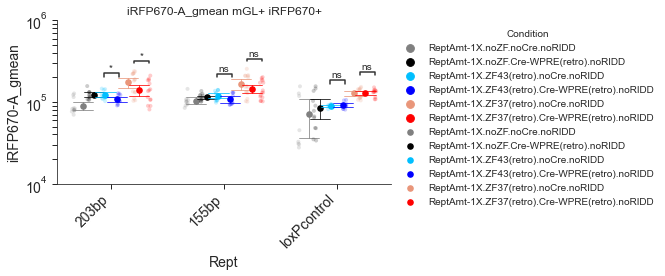

<Figure size 432x288 with 0 Axes>

In [11]:
#Plot summary plot for 1X, double gated 
## Plot just the 1X conditions with no RIDD
#set the hue, hue_order, palette 
repts_iRFP = pd.array(['203bp-lenti_div-iRFP670', '155bp-lenti_div-iRFP670', 'loxPcon-lenti_div-iRFP670'])
hue = 'cond2' 
hue_order = pd.array([
        'ReptAmt-1X.noZF.noCre.noRIDD',
       'ReptAmt-1X.noZF.Cre-WPRE(retro).noRIDD',
       'ReptAmt-1X.ZF43(retro).noCre.noRIDD',
       'ReptAmt-1X.ZF43(retro).Cre-WPRE(retro).noRIDD',
       'ReptAmt-1X.ZF37(retro).noCre.noRIDD',
       'ReptAmt-1X.ZF37(retro).Cre-WPRE(retro).noRIDD',
])

palette = {
       'ReptAmt-1X.noZF.noCre.noRIDD': 'grey',
       'ReptAmt-1X.noZF.Cre-WPRE(retro).noRIDD': 'black', 
       'ReptAmt-1X.ZF43(retro).noCre.noRIDD':'deepskyblue',
       'ReptAmt-1X.ZF43(retro).Cre-WPRE(retro).noRIDD':'blue',
       'ReptAmt-1X.ZF37(retro).noCre.noRIDD': 'darksalmon',
       'ReptAmt-1X.ZF37(retro).Cre-WPRE(retro).noRIDD': 'red'}

data_fig = s_well_iRFPgated_mGLgated[ s_well_iRFPgated_mGLgated['cond2'].isin(hue_order)]
data_fig = data_fig[ data_fig['reporter'].isin(repts_iRFP)]
data_fig_short = data_fig[ data_fig['reporter']!= 'loxPcon-lenti_div-iRFP670']

#List of stats to plot 
stats_plot = pd.array( ['mGL-A_gmean', 'TagBFP-A_gmean', 'mCherry-A_gmean', 'iRFP670-A_gmean'])
#set plotting parameters 
order = pd.array(['203bp','155bp','loxPcontrol']); palette = palette; hue_order = hue_order; 
x = 'Rept'; hue='cond2'; yscale= 'log'
ylims = {  'mGL-A_gmean': [5e3, 7e4], 
        'TagBFP-A_gmean': [1e1, 1e3], 
        'mCherry-A_gmean': [1e1, 1e3], 
         'iRFP670-A_gmean': [1e4, 1e6] }   


#Set p-value significance comparisons 
pairs = [
       [ ('203bp','ReptAmt-1X.ZF43(retro).noCre.noRIDD' ), 
              ('203bp',  'ReptAmt-1X.ZF43(retro).Cre-WPRE(retro).noRIDD')],
       [ ('155bp','ReptAmt-1X.ZF43(retro).noCre.noRIDD' ), 
              ('155bp',  'ReptAmt-1X.ZF43(retro).Cre-WPRE(retro).noRIDD')],
       [ ('loxPcontrol','ReptAmt-1X.ZF43(retro).noCre.noRIDD' ), 
              ('loxPcontrol',  'ReptAmt-1X.ZF43(retro).Cre-WPRE(retro).noRIDD')],
       [ ('203bp','ReptAmt-1X.ZF37(retro).noCre.noRIDD' ), 
              ('203bp',  'ReptAmt-1X.ZF37(retro).Cre-WPRE(retro).noRIDD')],
       [ ('155bp','ReptAmt-1X.ZF37(retro).noCre.noRIDD' ), 
              ('155bp',  'ReptAmt-1X.ZF37(retro).Cre-WPRE(retro).noRIDD')],
       [ ('loxPcontrol','ReptAmt-1X.ZF37(retro).noCre.noRIDD' ), 
              ('loxPcontrol',  'ReptAmt-1X.ZF37(retro).Cre-WPRE(retro).noRIDD')],
]


xsize =6  ; ysize = 3
fontsize = 14

for stat in stats_plot:
       data_now = data_fig
       y = stat # set the stat to plot
       ylim = ylims[stat]
       yscale = 'log'
       plottitle = y + ' mGL+ iRFP670+'
       g = plt.figure(figsize=(xsize,ysize))
       g = summary_plot( x=x, y=y, hue=hue, data=data_now, pairs=pairs, yscale=yscale, 
                     ylim=ylim, fontsize=fontsize,
                     x_rot=45, palette = palette, order=order, hue_order=hue_order, plottitle=plottitle)
       g.figure.savefig(figure_folder + plottitle + '.svg',dpi=300,bbox_inches='tight')

## Summary plot, no loxPcond TagBFP+ for ZF43 and mCh+ for ZF37

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

203bp_ReptAmt-1X.ZF37(retro).noCre.noRIDD v.s. 203bp_ReptAmt-1X.ZF37(retro).Cre-WPRE(retro).noRIDD: t-test independent samples, P_val=2.447e-03 stat=-4.349e+00
155bp_ReptAmt-1X.ZF37(retro).noCre.noRIDD v.s. 155bp_ReptAmt-1X.ZF37(retro).Cre-WPRE(retro).noRIDD: t-test independent samples, P_val=3.415e-02 stat=-2.550e+00
155bp_ReptAmt-1X.ZF43(retro).noCre.noRIDD v.s. 155bp_ReptAmt-1X.ZF43(retro).Cre-WPRE(retro).noRIDD: t-test independent samples, P_val=1.615e-01 stat=-1.596e+00
203bp_ReptAmt-1X.ZF43(retro).noCre.noRIDD v.s. 203bp_ReptAmt-1X.ZF43(retro).Cre-WPRE(retro).noRIDD: t-test independent samples, P_val=1.457e-02 stat=-3.396e+00


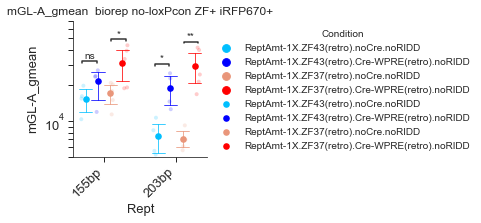

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

203bp_ReptAmt-1X.ZF37(retro).noCre.noRIDD v.s. 203bp_ReptAmt-1X.ZF37(retro).Cre-WPRE(retro).noRIDD: t-test independent samples, P_val=6.551e-01 stat=-4.639e-01
155bp_ReptAmt-1X.ZF37(retro).noCre.noRIDD v.s. 155bp_ReptAmt-1X.ZF37(retro).Cre-WPRE(retro).noRIDD: t-test independent samples, P_val=3.681e-01 stat=-9.538e-01
155bp_ReptAmt-1X.ZF43(retro).noCre.noRIDD v.s. 155bp_ReptAmt-1X.ZF43(retro).Cre-WPRE(retro).noRIDD: t-test independent samples, P_val=2.950e-01 stat=1.147e+00
203bp_ReptAmt-1X.ZF43(retro).noCre.noRIDD v.s. 203bp_ReptAmt-1X.ZF43(retro).Cre-WPRE(retro).noRIDD: t-test independent samples, P_val=2.149e-01 stat=1.386e+00


<Figure size 432x288 with 0 Axes>

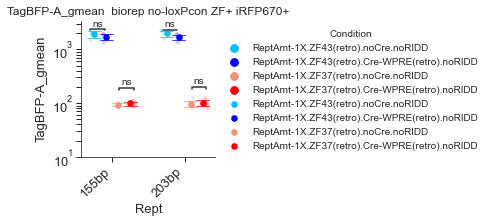

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

203bp_ReptAmt-1X.ZF37(retro).noCre.noRIDD v.s. 203bp_ReptAmt-1X.ZF37(retro).Cre-WPRE(retro).noRIDD: t-test independent samples, P_val=3.422e-01 stat=1.010e+00
155bp_ReptAmt-1X.ZF37(retro).noCre.noRIDD v.s. 155bp_ReptAmt-1X.ZF37(retro).Cre-WPRE(retro).noRIDD: t-test independent samples, P_val=3.445e-01 stat=1.005e+00
155bp_ReptAmt-1X.ZF43(retro).noCre.noRIDD v.s. 155bp_ReptAmt-1X.ZF43(retro).Cre-WPRE(retro).noRIDD: t-test independent samples, P_val=7.832e-01 stat=-2.878e-01
203bp_ReptAmt-1X.ZF43(retro).noCre.noRIDD v.s. 203bp_ReptAmt-1X.ZF43(retro).Cre-WPRE(retro).noRIDD: t-test independent samples, P_val=9.258e-01 stat=-9.711e-02


<Figure size 432x288 with 0 Axes>

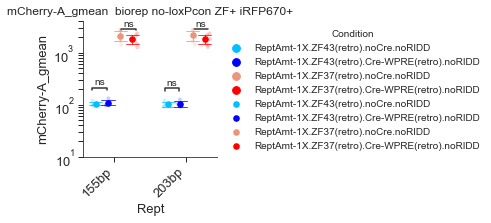

,bioreplicate
1,2024.04.22_DIAL_MEFs
2,2024.05.13_DIAL_MEFs
3,2024.05.20_DIAL_MEFs
4,2024.06.03_DIAL_MEFs
5,20240415flow_MEFs3dpi
9,2024.04.22_DIAL_MEFs
10,2024.05.13_DIAL_MEFs
11,2024.05.20_DIAL_MEFs
12,2024.06.03_DIAL_MEFs
13,20240415flow_MEFs3dpi


<Figure size 432x288 with 0 Axes>

In [12]:
#Plot summary plot for 1X, double gated 
## Plot just the 1X conditions with no RIDD
#set the hue, hue_order, palette 
repts_iRFP = pd.array([ '155bp-lenti_div-iRFP670','203bp-lenti_div-iRFP670'])
hue = 'cond2' 
hue_order = pd.array([
       'ReptAmt-1X.ZF43(retro).noCre.noRIDD',
       'ReptAmt-1X.ZF43(retro).Cre-WPRE(retro).noRIDD',
       'ReptAmt-1X.ZF37(retro).noCre.noRIDD',
       'ReptAmt-1X.ZF37(retro).Cre-WPRE(retro).noRIDD',
])

palette = {
       'ReptAmt-1X.noZF.noCre.noRIDD': 'grey',
       'ReptAmt-1X.noZF.Cre-WPRE(retro).noRIDD': 'black', 
       'ReptAmt-1X.ZF43(retro).noCre.noRIDD':'deepskyblue',
       'ReptAmt-1X.ZF43(retro).Cre-WPRE(retro).noRIDD':'blue',
       'ReptAmt-1X.ZF37(retro).noCre.noRIDD': 'darksalmon',
       'ReptAmt-1X.ZF37(retro).Cre-WPRE(retro).noRIDD': 'red'}

#Get data for ZF37
data_fig_ZF37 = s_bioreplicate_iRFPgated_mCherrygated[ s_bioreplicate_iRFPgated_mCherrygated['cond2'].isin( 
       ['ReptAmt-1X.ZF37(retro).noCre.noRIDD',
       'ReptAmt-1X.ZF37(retro).Cre-WPRE(retro).noRIDD']) ]
data_fig_ZF37 = data_fig_ZF37[ data_fig_ZF37['reporter'].isin(repts_iRFP)]

#Get data for ZF43
data_fig_ZF43 = s_bioreplicate_iRFPgated_TagBFP[ s_bioreplicate_iRFPgated_TagBFP['cond2'].isin( 
       ['ReptAmt-1X.ZF43(retro).noCre.noRIDD',
       'ReptAmt-1X.ZF43(retro).Cre-WPRE(retro).noRIDD']) ]

#Concatenate for data fig
data_fig = pd.concat( [data_fig_ZF37, data_fig_ZF43])

#List of stats to plot 
stats_plot = pd.array( ['mGL-A_gmean', 'TagBFP-A_gmean', 'mCherry-A_gmean'])
#set plotting parameters 
order = pd.array(['155bp','203bp']); palette = palette; hue_order = hue_order; 
x = 'Rept'; hue='cond2'; yscale= 'log'
ylim = [6e3, 4e4]
ylims = {  'mGL-A_gmean': [5e3, 7e4], 
        'TagBFP-A_gmean': [1e1, 1e3], 
        'mCherry-A_gmean': [1e1, 1e3], 
         'iRFP670-A_gmean': [1e4, 1e6] }  


#Set p-value significance comparisons 
pairs = [
       [ ('203bp','ReptAmt-1X.ZF43(retro).noCre.noRIDD' ), 
              ('203bp',  'ReptAmt-1X.ZF43(retro).Cre-WPRE(retro).noRIDD')],
       [ ('155bp','ReptAmt-1X.ZF43(retro).noCre.noRIDD' ), 
              ('155bp',  'ReptAmt-1X.ZF43(retro).Cre-WPRE(retro).noRIDD')],
       [ ('203bp','ReptAmt-1X.ZF37(retro).noCre.noRIDD' ), 
              ('203bp',  'ReptAmt-1X.ZF37(retro).Cre-WPRE(retro).noRIDD')],
       [ ('155bp','ReptAmt-1X.ZF37(retro).noCre.noRIDD' ), 
              ('155bp',  'ReptAmt-1X.ZF37(retro).Cre-WPRE(retro).noRIDD')],
]

xsize =6  ; ysize = 2.5
fontsize = 13

for stat in stats_plot:
       data_now = data_fig

       ylim = ylims[stat]
       y = stat # set the stat to plot
       yscale = 'log'
       plottitle = y + '  biorep no-loxPcon ZF+ iRFP670+'
       g = plt.figure(figsize=(xsize/3*1.2,ysize))
       g = summary_plot( x=x, y=y, hue=hue, data=data_now, pairs=pairs, yscale=yscale, 
                     ylim=ylim, fontsize=fontsize,
                     x_rot=45, palette = palette, order=order, hue_order=hue_order, plottitle=plottitle)
       g.figure.savefig(figure_folder + plottitle + '.svg',dpi=300,bbox_inches='tight')

display(data_fig[['bioreplicate']]) 

## Summary plot no loxPcon, ZF+ gated and noZFjust iRFP670+

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

203bp_ReptAmt-1X.ZF37(retro).noCre.noRIDD v.s. 203bp_ReptAmt-1X.ZF37(retro).Cre-WPRE(retro).noRIDD: t-test independent samples, P_val=2.447e-03 stat=-4.349e+00
155bp_ReptAmt-1X.ZF37(retro).noCre.noRIDD v.s. 155bp_ReptAmt-1X.ZF37(retro).Cre-WPRE(retro).noRIDD: t-test independent samples, P_val=3.415e-02 stat=-2.550e+00
155bp_ReptAmt-1X.ZF43(retro).noCre.noRIDD v.s. 155bp_ReptAmt-1X.ZF43(retro).Cre-WPRE(retro).noRIDD: t-test independent samples, P_val=1.615e-01 stat=-1.596e+00
203bp_ReptAmt-1X.ZF43(retro).noCre.noRIDD v.s. 203bp_ReptAmt-1X.ZF43(retro).Cre-WPRE(retro).noRIDD: t-test independent samples, P_val=1.457e-02 stat=-3.396e+00


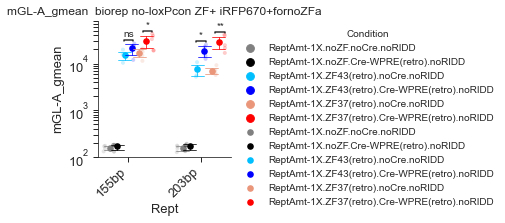

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

203bp_ReptAmt-1X.ZF37(retro).noCre.noRIDD v.s. 203bp_ReptAmt-1X.ZF37(retro).Cre-WPRE(retro).noRIDD: t-test independent samples, P_val=6.551e-01 stat=-4.639e-01
155bp_ReptAmt-1X.ZF37(retro).noCre.noRIDD v.s. 155bp_ReptAmt-1X.ZF37(retro).Cre-WPRE(retro).noRIDD: t-test independent samples, P_val=3.681e-01 stat=-9.538e-01
155bp_ReptAmt-1X.ZF43(retro).noCre.noRIDD v.s. 155bp_ReptAmt-1X.ZF43(retro).Cre-WPRE(retro).noRIDD: t-test independent samples, P_val=2.950e-01 stat=1.147e+00
203bp_ReptAmt-1X.ZF43(retro).noCre.noRIDD v.s. 203bp_ReptAmt-1X.ZF43(retro).Cre-WPRE(retro).noRIDD: t-test independent samples, P_val=2.149e-01 stat=1.386e+00


<Figure size 432x288 with 0 Axes>

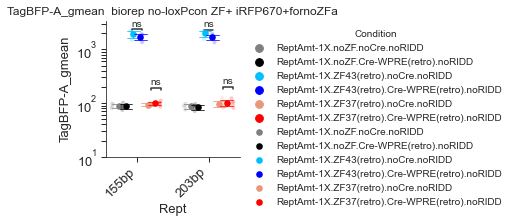

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

203bp_ReptAmt-1X.ZF37(retro).noCre.noRIDD v.s. 203bp_ReptAmt-1X.ZF37(retro).Cre-WPRE(retro).noRIDD: t-test independent samples, P_val=3.422e-01 stat=1.010e+00
155bp_ReptAmt-1X.ZF37(retro).noCre.noRIDD v.s. 155bp_ReptAmt-1X.ZF37(retro).Cre-WPRE(retro).noRIDD: t-test independent samples, P_val=3.445e-01 stat=1.005e+00
155bp_ReptAmt-1X.ZF43(retro).noCre.noRIDD v.s. 155bp_ReptAmt-1X.ZF43(retro).Cre-WPRE(retro).noRIDD: t-test independent samples, P_val=7.832e-01 stat=-2.878e-01
203bp_ReptAmt-1X.ZF43(retro).noCre.noRIDD v.s. 203bp_ReptAmt-1X.ZF43(retro).Cre-WPRE(retro).noRIDD: t-test independent samples, P_val=9.258e-01 stat=-9.711e-02


<Figure size 432x288 with 0 Axes>

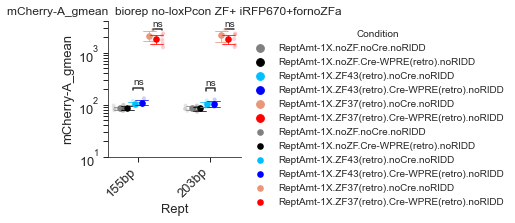

<Figure size 432x288 with 0 Axes>

In [13]:
#Plot summary plot for 1X, double gated 
## Plot just the 1X conditions with no RIDD
#set the hue, hue_order, palette 
repts_iRFP = pd.array([ '155bp-lenti_div-iRFP670','203bp-lenti_div-iRFP670'])
hue = 'cond2' 
hue_order = pd.array([
       'ReptAmt-1X.noZF.noCre.noRIDD',
       'ReptAmt-1X.noZF.Cre-WPRE(retro).noRIDD', 
       'ReptAmt-1X.ZF43(retro).noCre.noRIDD',
       'ReptAmt-1X.ZF43(retro).Cre-WPRE(retro).noRIDD',
       'ReptAmt-1X.ZF37(retro).noCre.noRIDD',
       'ReptAmt-1X.ZF37(retro).Cre-WPRE(retro).noRIDD',
    ])

palette = {
       'ReptAmt-1X.noZF.noCre.noRIDD': 'grey',
       'ReptAmt-1X.noZF.Cre-WPRE(retro).noRIDD': 'black', 
       'ReptAmt-1X.ZF43(retro).noCre.noRIDD':'deepskyblue',
       'ReptAmt-1X.ZF43(retro).Cre-WPRE(retro).noRIDD':'blue',
       'ReptAmt-1X.ZF37(retro).noCre.noRIDD': 'darksalmon',
       'ReptAmt-1X.ZF37(retro).Cre-WPRE(retro).noRIDD': 'red'}

#Get data for ZF37
data_fig_ZF37 = s_bioreplicate_iRFPgated_mCherrygated[ s_bioreplicate_iRFPgated_mCherrygated['cond2'].isin( 
       ['ReptAmt-1X.ZF37(retro).noCre.noRIDD',
       'ReptAmt-1X.ZF37(retro).Cre-WPRE(retro).noRIDD']) ]
data_fig_ZF37 = data_fig_ZF37[ data_fig_ZF37['reporter'].isin(repts_iRFP)]

#Get data for ZF43
data_fig_ZF43 = s_bioreplicate_iRFPgated_TagBFP[ s_bioreplicate_iRFPgated_TagBFP['cond2'].isin( 
       ['ReptAmt-1X.ZF43(retro).noCre.noRIDD',
       'ReptAmt-1X.ZF43(retro).Cre-WPRE(retro).noRIDD']) ]

#Get data for noZF
data_fig_noZF = s_bioreplicate_iRFPgated[ s_bioreplicate_iRFPgated['cond2'].isin( 
       ['ReptAmt-1X.noZF.noCre.noRIDD',
       'ReptAmt-1X.noZF.Cre-WPRE(retro).noRIDD' ]) ]

#Concatenate for data fig
data_fig = pd.concat( [data_fig_ZF37, data_fig_ZF43, data_fig_noZF])

#List of stats to plot 
stats_plot = pd.array( ['mGL-A_gmean', 'TagBFP-A_gmean', 'mCherry-A_gmean'])
#set plotting parameters 
order = pd.array(['155bp','203bp']); palette = palette; hue_order = hue_order; 
x = 'Rept'; hue='cond2'; yscale= 'log'
ylim = [6e3, 4e4]
ylims = {  'mGL-A_gmean': [1e2, 7e4], 
        'TagBFP-A_gmean': [1e1, 1e3], 
        'mCherry-A_gmean': [1e1, 1e3], 
         'iRFP670-A_gmean': [1e4, 1e6] }  


#Set p-value significance comparisons 
pairs = [
       [ ('203bp','ReptAmt-1X.ZF43(retro).noCre.noRIDD' ), 
              ('203bp',  'ReptAmt-1X.ZF43(retro).Cre-WPRE(retro).noRIDD')],
       [ ('155bp','ReptAmt-1X.ZF43(retro).noCre.noRIDD' ), 
              ('155bp',  'ReptAmt-1X.ZF43(retro).Cre-WPRE(retro).noRIDD')],
       [ ('203bp','ReptAmt-1X.ZF37(retro).noCre.noRIDD' ), 
              ('203bp',  'ReptAmt-1X.ZF37(retro).Cre-WPRE(retro).noRIDD')],
       [ ('155bp','ReptAmt-1X.ZF37(retro).noCre.noRIDD' ), 
              ('155bp',  'ReptAmt-1X.ZF37(retro).Cre-WPRE(retro).noRIDD')],
]

xsize =6  ; ysize = 2.5
fontsize = 13

for stat in stats_plot:
       data_now = data_fig
       ylim = ylims[stat]
       y = stat # set the stat to plot
       yscale = 'log'
       plottitle = y + '  biorep no-loxPcon ZF+ iRFP670+fornoZFa'
       g = plt.figure(figsize=(xsize/3*1.2,ysize))
       g = summary_plot( x=x, y=y, hue=hue, data=data_now, pairs=pairs, yscale=yscale, 
                     ylim=ylim, fontsize=fontsize,
                     x_rot=45, palette = palette, order=order, hue_order=hue_order, plottitle=plottitle)
       g.figure.savefig(figure_folder + plottitle + '.svg',dpi=300,bbox_inches='tight')

## No ZFa only Summary Plot

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

203bp_ReptAmt-1X.noZF.noCre.noRIDD v.s. 203bp_ReptAmt-1X.noZF.Cre-WPRE(retro).noRIDD: t-test independent samples, P_val=4.090e-01 stat=-8.874e-01
155bp_ReptAmt-1X.noZF.noCre.noRIDD v.s. 155bp_ReptAmt-1X.noZF.Cre-WPRE(retro).noRIDD: t-test independent samples, P_val=4.676e-01 stat=-7.753e-01


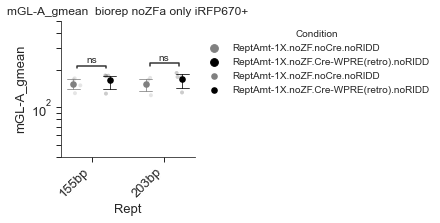

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

203bp_ReptAmt-1X.noZF.noCre.noRIDD v.s. 203bp_ReptAmt-1X.noZF.Cre-WPRE(retro).noRIDD: t-test independent samples, P_val=7.377e-01 stat=3.509e-01
155bp_ReptAmt-1X.noZF.noCre.noRIDD v.s. 155bp_ReptAmt-1X.noZF.Cre-WPRE(retro).noRIDD: t-test independent samples, P_val=7.505e-01 stat=3.330e-01


<Figure size 432x288 with 0 Axes>

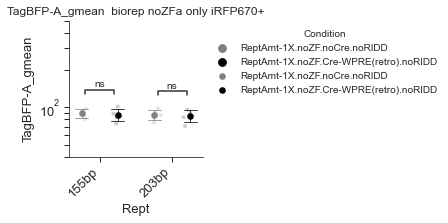

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

203bp_ReptAmt-1X.noZF.noCre.noRIDD v.s. 203bp_ReptAmt-1X.noZF.Cre-WPRE(retro).noRIDD: t-test independent samples, P_val=9.660e-01 stat=4.444e-02
155bp_ReptAmt-1X.noZF.noCre.noRIDD v.s. 155bp_ReptAmt-1X.noZF.Cre-WPRE(retro).noRIDD: t-test independent samples, P_val=9.824e-01 stat=-2.298e-02


<Figure size 432x288 with 0 Axes>

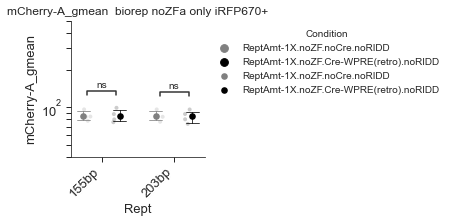

<Figure size 432x288 with 0 Axes>

In [14]:
#Plot summary plot for 1X, double gated 
## Plot just the 1X conditions with no RIDD
#set the hue, hue_order, palette 
repts_iRFP = pd.array([ '155bp-lenti_div-iRFP670','203bp-lenti_div-iRFP670'])
hue = 'cond2' 
hue_order = pd.array([
       'ReptAmt-1X.noZF.noCre.noRIDD',
       'ReptAmt-1X.noZF.Cre-WPRE(retro).noRIDD' 
    ])

palette = {
       'ReptAmt-1X.noZF.noCre.noRIDD': 'grey',
       'ReptAmt-1X.noZF.Cre-WPRE(retro).noRIDD': 'black', }

#Get data for ZF37
data_fig_ZF37 = s_bioreplicate_iRFPgated_mCherrygated[ s_bioreplicate_iRFPgated_mCherrygated['cond2'].isin( 
       ['ReptAmt-1X.ZF37(retro).noCre.noRIDD',
       'ReptAmt-1X.ZF37(retro).Cre-WPRE(retro).noRIDD']) ]
data_fig_ZF37 = data_fig_ZF37[ data_fig_ZF37['reporter'].isin(repts_iRFP)]

#Get data for ZF43
data_fig_ZF43 = s_bioreplicate_iRFPgated_TagBFP[ s_bioreplicate_iRFPgated_TagBFP['cond2'].isin( 
       ['ReptAmt-1X.ZF43(retro).noCre.noRIDD',
       'ReptAmt-1X.ZF43(retro).Cre-WPRE(retro).noRIDD']) ]

#Get data for noZF
data_fig_noZF = s_bioreplicate_iRFPgated[ s_bioreplicate_iRFPgated['cond2'].isin( 
       ['ReptAmt-1X.noZF.noCre.noRIDD',
       'ReptAmt-1X.noZF.Cre-WPRE(retro).noRIDD' ]) ]

#Concatenate for data fig
data_fig = pd.concat( [data_fig_noZF])

#List of stats to plot 
stats_plot = pd.array( ['mGL-A_gmean', 'TagBFP-A_gmean', 'mCherry-A_gmean'])
#set plotting parameters 
order = pd.array(['155bp','203bp']); palette = palette; hue_order = hue_order; 
x = 'Rept'; hue='cond2'; yscale= 'log'
ylim = [6e3, 4e4]
ylims = {  'mGL-A_gmean': [4e1, 5e2], 
        'TagBFP-A_gmean': [4e1, 5e2], 
        'mCherry-A_gmean': [4e1, 5e2], 
         'iRFP670-A_gmean': [4e1, 5e2] }  


#Set p-value significance comparisons 
pairs = [
       [ ('203bp','ReptAmt-1X.noZF.noCre.noRIDD' ), 
              ('203bp',  'ReptAmt-1X.noZF.Cre-WPRE(retro).noRIDD')],
       [ ('155bp','ReptAmt-1X.noZF.noCre.noRIDD' ), 
              ('155bp',  'ReptAmt-1X.noZF.Cre-WPRE(retro).noRIDD')],

]

xsize =6  ; ysize = 2.5
fontsize = 13

for stat in stats_plot:
       data_now = data_fig
       ylim = ylims[stat]
       y = stat # set the stat to plot
       yscale = 'log'
       plottitle = y + '  biorep noZFa only iRFP670+'
       g = plt.figure(figsize=(xsize/3*1.2,ysize))
       g = summary_plot( x=x, y=y, hue=hue, data=data_now, pairs=pairs, yscale=yscale, 
                     ylim=ylim, fontsize=fontsize,
                     x_rot=45, palette = palette, order=order, hue_order=hue_order, plottitle=plottitle)
       g.figure.savefig(figure_folder + plottitle + '.svg',dpi=300,bbox_inches='tight')

Summary Plot iRFP+ Gated, not mGL Gated

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

203bp_ReptAmt-1X.ZF37(retro).noCre.noRIDD v.s. 203bp_ReptAmt-1X.ZF37(retro).Cre-WPRE(retro).noRIDD: t-test independent samples, P_val=3.408e-01 stat=9.697e-01
155bp_ReptAmt-1X.ZF37(retro).noCre.noRIDD v.s. 155bp_ReptAmt-1X.ZF37(retro).Cre-WPRE(retro).noRIDD: t-test independent samples, P_val=3.978e-01 stat=8.586e-01
loxPcontrol_ReptAmt-1X.ZF37(retro).noCre.noRIDD v.s. loxPcontrol_ReptAmt-1X.ZF37(retro).Cre-WPRE(retro).noRIDD: t-test independent samples, P_val=6.531e-01 stat=-4.557e-01
203bp_ReptAmt-1X.ZF43(retro).noCre.noRIDD v.s. 203bp_ReptAmt-1X.ZF43(retro).Cre-WPRE(retro).noRIDD: t-test independent samples, P_val=3.195e-02 stat=2.298e+00
155bp_ReptAmt-1X.ZF43(retro).noCre.noRIDD v.s. 155bp_ReptAmt-1X.ZF43(retro).Cre-WPRE(retro).noRIDD: t-test independent samples, P_val=5.218e-03 stat=3.135e+00
loxPcontrol_ReptAmt-1X.ZF43(

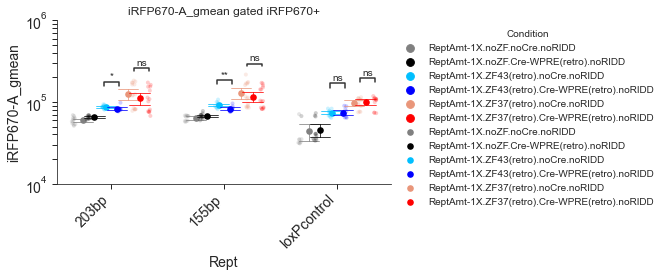

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

203bp_ReptAmt-1X.ZF37(retro).noCre.noRIDD v.s. 203bp_ReptAmt-1X.ZF37(retro).Cre-WPRE(retro).noRIDD: t-test independent samples, P_val=4.187e-01 stat=-8.213e-01
155bp_ReptAmt-1X.ZF37(retro).noCre.noRIDD v.s. 155bp_ReptAmt-1X.ZF37(retro).Cre-WPRE(retro).noRIDD: t-test independent samples, P_val=1.257e-01 stat=-1.578e+00
loxPcontrol_ReptAmt-1X.ZF37(retro).noCre.noRIDD v.s. loxPcontrol_ReptAmt-1X.ZF37(retro).Cre-WPRE(retro).noRIDD: t-test independent samples, P_val=3.163e-01 stat=-1.026e+00
203bp_ReptAmt-1X.ZF43(retro).noCre.noRIDD v.s. 203bp_ReptAmt-1X.ZF43(retro).Cre-WPRE(retro).noRIDD: t-test independent samples, P_val=5.177e-02 stat=2.062e+00
155bp_ReptAmt-1X.ZF43(retro).noCre.noRIDD v.s. 155bp_ReptAmt-1X.ZF43(retro).Cre-WPRE(retro).noRIDD: t-test independent samples, P_val=6.899e-02 stat=1.922e+00
loxPcontrol_ReptAmt-1X.ZF4

<Figure size 432x288 with 0 Axes>

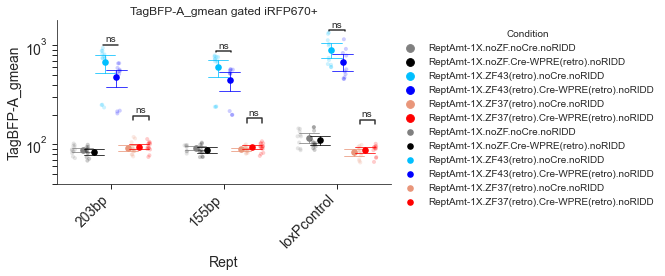

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

203bp_ReptAmt-1X.ZF37(retro).noCre.noRIDD v.s. 203bp_ReptAmt-1X.ZF37(retro).Cre-WPRE(retro).noRIDD: t-test independent samples, P_val=5.650e-02 stat=1.993e+00
155bp_ReptAmt-1X.ZF37(retro).noCre.noRIDD v.s. 155bp_ReptAmt-1X.ZF37(retro).Cre-WPRE(retro).noRIDD: t-test independent samples, P_val=1.461e-01 stat=1.495e+00
loxPcontrol_ReptAmt-1X.ZF37(retro).noCre.noRIDD v.s. loxPcontrol_ReptAmt-1X.ZF37(retro).Cre-WPRE(retro).noRIDD: t-test independent samples, P_val=3.277e-01 stat=1.001e+00
203bp_ReptAmt-1X.ZF43(retro).noCre.noRIDD v.s. 203bp_ReptAmt-1X.ZF43(retro).Cre-WPRE(retro).noRIDD: t-test independent samples, P_val=9.157e-01 stat=1.072e-01
155bp_ReptAmt-1X.ZF43(retro).noCre.noRIDD v.s. 155bp_ReptAmt-1X.ZF43(retro).Cre-WPRE(retro).noRIDD: t-test independent samples, P_val=8.726e-01 stat=-1.624e-01
loxPcontrol_ReptAmt-1X.ZF43(

<Figure size 432x288 with 0 Axes>

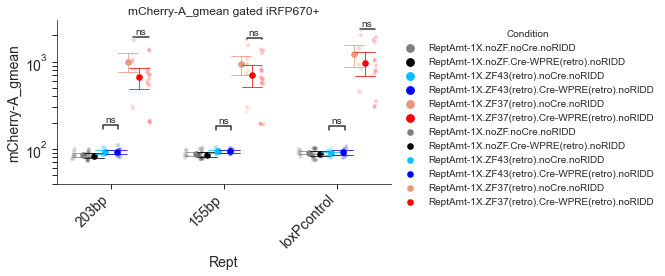

<Figure size 432x288 with 0 Axes>

In [15]:
#Plot summary plot for 1X, double gated 
## Plot just the 1X conditions with no RIDD
#set the hue, hue_order, palette 
repts_iRFP = pd.array(['203bp-lenti_div-iRFP670', '155bp-lenti_div-iRFP670', 'loxPcon-lenti_div-iRFP670'])
hue = 'cond2' 
hue_order = pd.array([
        'ReptAmt-1X.noZF.noCre.noRIDD',
       'ReptAmt-1X.noZF.Cre-WPRE(retro).noRIDD',
       'ReptAmt-1X.ZF43(retro).noCre.noRIDD',
       'ReptAmt-1X.ZF43(retro).Cre-WPRE(retro).noRIDD',
       'ReptAmt-1X.ZF37(retro).noCre.noRIDD',
       'ReptAmt-1X.ZF37(retro).Cre-WPRE(retro).noRIDD',
])

palette = {
       'ReptAmt-1X.noZF.noCre.noRIDD': 'grey',
       'ReptAmt-1X.noZF.Cre-WPRE(retro).noRIDD': 'black', 
       'ReptAmt-1X.ZF43(retro).noCre.noRIDD':'deepskyblue',
       'ReptAmt-1X.ZF43(retro).Cre-WPRE(retro).noRIDD':'blue',
       'ReptAmt-1X.ZF37(retro).noCre.noRIDD': 'darksalmon',
       'ReptAmt-1X.ZF37(retro).Cre-WPRE(retro).noRIDD': 'red'}

data_fig = s_well_iRFPgated[ s_well_iRFPgated['cond2'].isin(hue_order)]
data_fig = data_fig[ data_fig['reporter'].isin(repts_iRFP)]
data_fig_short = data_fig[ data_fig['reporter']!= 'loxPcon-lenti_div-iRFP670']

#List of stats to plot 
stats_plot = pd.array( ['iRFP670-A_gmean', 'TagBFP-A_gmean', 'mCherry-A_gmean'])
#set plotting parameters 
order = pd.array(['203bp','155bp','loxPcontrol']); palette = palette; hue_order = hue_order; 
x = 'Rept'; hue='cond2'; yscale= 'log'
ylims = {  'mGL-A_gmean': [5e3, 7e4], 
        'TagBFP-A_gmean': [4e1, 1e3], 
        'mCherry-A_gmean': [4e1, 1e3],
         'iRFP670-A_gmean': [1e4, 1e6] }   


#Set p-value significance comparisons 
pairs = [
       [ ('203bp','ReptAmt-1X.ZF43(retro).noCre.noRIDD' ), 
              ('203bp',  'ReptAmt-1X.ZF43(retro).Cre-WPRE(retro).noRIDD')],
       [ ('155bp','ReptAmt-1X.ZF43(retro).noCre.noRIDD' ), 
              ('155bp',  'ReptAmt-1X.ZF43(retro).Cre-WPRE(retro).noRIDD')],
       [ ('loxPcontrol','ReptAmt-1X.ZF43(retro).noCre.noRIDD' ), 
              ('loxPcontrol',  'ReptAmt-1X.ZF43(retro).Cre-WPRE(retro).noRIDD')],
       [ ('203bp','ReptAmt-1X.ZF37(retro).noCre.noRIDD' ), 
              ('203bp',  'ReptAmt-1X.ZF37(retro).Cre-WPRE(retro).noRIDD')],
       [ ('155bp','ReptAmt-1X.ZF37(retro).noCre.noRIDD' ), 
              ('155bp',  'ReptAmt-1X.ZF37(retro).Cre-WPRE(retro).noRIDD')],
       [ ('loxPcontrol','ReptAmt-1X.ZF37(retro).noCre.noRIDD' ), 
              ('loxPcontrol',  'ReptAmt-1X.ZF37(retro).Cre-WPRE(retro).noRIDD')],
]

xsize =6  ; ysize = 3
fontsize = 14

for stat in stats_plot:
       data_now = data_fig
       y = stat # set the stat to plot
       ylim = ylims[stat]
       yscale = 'log'
       plottitle = y + ' gated iRFP670+'
       g = plt.figure(figsize=(xsize,ysize))
       g = summary_plot( x=x, y=y, hue=hue, data=data_now, pairs=pairs, yscale=yscale, 
                     ylim=ylim, fontsize=fontsize,
                     x_rot=45, palette = palette, order=order, hue_order=hue_order, plottitle=plottitle)
       g.figure.savefig(figure_folder + plottitle + '.svg',dpi=300,bbox_inches='tight')

# Calculate Fold Changes for gated on ZF positive

In [16]:
# Normalized summary plots with 3 bioreps to within spacer, +ZF -Cre
repts_iRFP = pd.array(['203bp-lenti_div-iRFP670', '155bp-lenti_div-iRFP670', 'loxPcon-lenti_div-iRFP670'])
bioreps_plot = pd.unique( data['bioreplicate'] )
cond2s = pd.array([
        'ReptAmt-1X.noZF.noCre.noRIDD',
       'ReptAmt-1X.noZF.Cre-WPRE(retro).noRIDD',
       'ReptAmt-1X.ZF43(retro).noCre.noRIDD',
       'ReptAmt-1X.ZF43(retro).Cre-WPRE(retro).noRIDD',
       'ReptAmt-1X.ZF37(retro).noCre.noRIDD',
       'ReptAmt-1X.ZF37(retro).Cre-WPRE(retro).noRIDD',
])

s_normalized = pd.DataFrame()

for biorep in bioreps_plot:
    df_biorep = data_iRFP670gated[data_iRFP670gated['bioreplicate'] == biorep] #choose dataframe
    df_biorep = df_biorep[df_biorep['reporter'].isin(repts_iRFP)]
    df_biorep = df_biorep[ df_biorep['cond2'].isin(cond2s)]
    #Make dataframe so that tagBFP gated for ZF43, and mCh gated for ZF37
    df_biorep_ZF37 = df_biorep[ (df_biorep['ZF']=='ZF37(retro)') & (df_biorep['mCherry-A']>1000)]
    df_biorep_ZF43 = df_biorep[ (df_biorep['ZF']=='ZF43(retro)') & (df_biorep['TagBFP-A']>1000)]
    df_biorep = pd.concat( [df_biorep_ZF37, df_biorep_ZF43])

    # dataframe with only divergent iRFP670 ones
    by = ['Rept', 'reporter','ZF', 'Cre', 'cond', 'cond2', 'bioreplicate'] #how to filter results, columns 
    x = ['mGL-A', 'TagBFP-A', 'mCherry-A'] #which parameter to calculate results on
    stat = [sp.stats.gmean] #statistics to calculate
    s_biorep = calc_stats(df_biorep,by,x,stat) #calculate statistics 

    
    loxP_ZF37_noCre = s_biorep[(s_biorep['Rept'] == 'loxPcontrol') & (s_biorep['Cre'] == 'noCre') & (s_biorep['ZF'] == 'ZF37(retro)')]['mGL-A_gmean']
    if len(loxP_ZF37_noCre)>0:
        loxP_ZF37_noCre = loxP_ZF37_noCre.iloc[0]

    loxP_ZF43_noCre = s_biorep[(s_biorep['Rept'] == 'loxPcontrol') & (s_biorep['Cre'] == 'noCre') & (s_biorep['ZF'] == 'ZF43(retro)')]['mGL-A_gmean']
    if len(loxP_ZF43_noCre)>0:
        loxP_ZF43_noCre = loxP_ZF43_noCre.iloc[0]


    s155bp_ZF37_noCre = s_biorep[(s_biorep['Rept'] == '155bp') & (s_biorep['Cre'] == 'noCre') & (s_biorep['ZF'] == 'ZF37(retro)')]['mGL-A_gmean']
    if len(s155bp_ZF37_noCre)>0:
        s155bp_ZF37_noCre = s155bp_ZF37_noCre.iloc[0]


    s155bp_ZF43_noCre = s_biorep[(s_biorep['Rept'] == '155bp') & (s_biorep['Cre'] == 'noCre') & (s_biorep['ZF'] == 'ZF43(retro)')]['mGL-A_gmean']
    if len(s155bp_ZF43_noCre)>0:
        s155bp_ZF43_noCre = s155bp_ZF43_noCre.iloc[0]

    s203bp_ZF37_noCre = s_biorep[(s_biorep['Rept'] == '203bp') & (s_biorep['Cre'] == 'noCre') & (s_biorep['ZF'] == 'ZF37(retro)')]['mGL-A_gmean']
    if len(s203bp_ZF37_noCre)>0:
        s203bp_ZF37_noCre = s203bp_ZF37_noCre.iloc[0]

    s203bp_ZF43_noCre = s_biorep[(s_biorep['Rept'] == '203bp') & (s_biorep['Cre'] == 'noCre') & (s_biorep['ZF'] == 'ZF43(retro)')]['mGL-A_gmean']
    if len(s203bp_ZF43_noCre)>0:
        s203bp_ZF43_noCre = s203bp_ZF43_noCre.iloc[0]

    def normalize_mGL_gmean(row):
        if row['Rept'] == 'loxPcontrol':
            if row['ZF'] == 'ZF37(retro)':
                return row['mGL-A_gmean'] / loxP_ZF37_noCre
            else:
                return row['mGL-A_gmean'] / loxP_ZF43_noCre
        elif row['Rept'] == '155bp':
            if row['ZF'] == 'ZF37(retro)':
                return row['mGL-A_gmean'] / s155bp_ZF37_noCre
            else:
                return row['mGL-A_gmean'] / s155bp_ZF43_noCre
        elif row['Rept'] == '203bp':
            if row['ZF'] == 'ZF37(retro)':
                return row['mGL-A_gmean'] / s203bp_ZF37_noCre
            else:
                return row['mGL-A_gmean'] / s203bp_ZF43_noCre
            
    s_biorep['Fold Change'] = s_biorep.apply(normalize_mGL_gmean, axis=1)
    display(s_biorep)
    s_normalized = pd.concat([s_normalized, s_biorep], ignore_index=True)


#display(s_normalized[ s_normalized['ZF']=='ZF37(retro)'])

,Rept,reporter,ZF,Cre,cond,cond2,bioreplicate,mGL-A_gmean,TagBFP-A_gmean,mCherry-A_gmean,Fraction,Count,Fold Change
0,155bp,155bp-lenti_div-iRFP670,ZF37(retro),Cre-WPRE(retro),155bp-lenti_div-iRFP670-1X.ZF37(retro).Cre-WPR...,ReptAmt-1X.ZF37(retro).Cre-WPRE(retro).noRIDD,20240415flow_MEFs3dpi,18966.614756,116.376854,1702.933018,1.0,1836,1.230561
1,155bp,155bp-lenti_div-iRFP670,ZF37(retro),noCre,155bp-lenti_div-iRFP670-1X.ZF37(retro).noCre.n...,ReptAmt-1X.ZF37(retro).noCre.noRIDD,20240415flow_MEFs3dpi,15412.983772,108.530717,1888.805579,1.0,3185,1.000000
2,203bp,203bp-lenti_div-iRFP670,ZF37(retro),Cre-WPRE(retro),203bp-lenti_div-iRFP670-1X.ZF37(retro).Cre-WPR...,ReptAmt-1X.ZF37(retro).Cre-WPRE(retro).noRIDD,20240415flow_MEFs3dpi,16828.479710,130.664980,1639.723204,1.0,1787,2.948886
3,203bp,203bp-lenti_div-iRFP670,ZF37(retro),noCre,203bp-lenti_div-iRFP670-1X.ZF37(retro).noCre.n...,ReptAmt-1X.ZF37(retro).noCre.noRIDD,20240415flow_MEFs3dpi,5706.723969,126.515022,1864.328097,1.0,2844,1.000000


,Rept,reporter,ZF,Cre,cond,cond2,bioreplicate,mGL-A_gmean,TagBFP-A_gmean,mCherry-A_gmean,Fraction,Count,Fold Change
0,155bp,155bp-lenti_div-iRFP670,ZF37(retro),Cre-WPRE(retro),155bp-lenti_div-iRFP670-1X.ZF37(retro).Cre-WPR...,ReptAmt-1X.ZF37(retro).Cre-WPRE(retro).noRIDD,2024.04.22_DIAL_MEFs,18638.101664,93.933763,2316.044900,1.0,2134,1.614102
1,155bp,155bp-lenti_div-iRFP670,ZF37(retro),noCre,155bp-lenti_div-iRFP670-1X.ZF37(retro).noCre.n...,ReptAmt-1X.ZF37(retro).noCre.noRIDD,2024.04.22_DIAL_MEFs,11547.043351,86.253234,2916.237748,1.0,3590,1.000000
2,155bp,155bp-lenti_div-iRFP670,ZF43(retro),Cre-WPRE(retro),155bp-lenti_div-iRFP670-1X.ZF43(retro).Cre-WPR...,ReptAmt-1X.ZF43(retro).Cre-WPRE(retro).noRIDD,2024.04.22_DIAL_MEFs,11383.271024,2122.814051,100.283526,1.0,1571,1.101336
3,155bp,155bp-lenti_div-iRFP670,ZF43(retro),noCre,155bp-lenti_div-iRFP670-1X.ZF43(retro).noCre.n...,ReptAmt-1X.ZF43(retro).noCre.noRIDD,2024.04.22_DIAL_MEFs,10335.874685,2490.291688,103.425610,1.0,2314,1.000000
4,203bp,203bp-lenti_div-iRFP670,ZF37(retro),Cre-WPRE(retro),203bp-lenti_div-iRFP670-1X.ZF37(retro).Cre-WPR...,ReptAmt-1X.ZF37(retro).Cre-WPRE(retro).noRIDD,2024.04.22_DIAL_MEFs,21150.526508,92.684254,2396.105960,1.0,2206,3.426265
5,203bp,203bp-lenti_div-iRFP670,ZF37(retro),noCre,203bp-lenti_div-iRFP670-1X.ZF37(retro).noCre.n...,ReptAmt-1X.ZF37(retro).noCre.noRIDD,2024.04.22_DIAL_MEFs,6173.055896,84.585205,2922.365723,1.0,3030,1.000000
6,203bp,203bp-lenti_div-iRFP670,ZF43(retro),Cre-WPRE(retro),203bp-lenti_div-iRFP670-1X.ZF43(retro).Cre-WPR...,ReptAmt-1X.ZF43(retro).Cre-WPRE(retro).noRIDD,2024.04.22_DIAL_MEFs,12044.407662,2080.624158,105.701230,1.0,1333,2.189227
7,203bp,203bp-lenti_div-iRFP670,ZF43(retro),noCre,203bp-lenti_div-iRFP670-1X.ZF43(retro).noCre.n...,ReptAmt-1X.ZF43(retro).noCre.noRIDD,2024.04.22_DIAL_MEFs,5501.672581,2441.529269,104.613849,1.0,1970,1.000000
8,loxPcontrol,loxPcon-lenti_div-iRFP670,ZF37(retro),Cre-WPRE(retro),loxPcon-lenti_div-iRFP670-1X.ZF37(retro).Cre-W...,ReptAmt-1X.ZF37(retro).Cre-WPRE(retro).noRIDD,2024.04.22_DIAL_MEFs,22172.414271,90.108685,2330.974384,1.0,1917,0.380592
9,loxPcontrol,loxPcon-lenti_div-iRFP670,ZF37(retro),noCre,loxPcon-lenti_div-iRFP670-1X.ZF37(retro).noCre...,ReptAmt-1X.ZF37(retro).noCre.noRIDD,2024.04.22_DIAL_MEFs,58257.645861,86.603131,2763.998622,1.0,2212,1.000000


,Rept,reporter,ZF,Cre,cond,cond2,bioreplicate,mGL-A_gmean,TagBFP-A_gmean,mCherry-A_gmean,Fraction,Count,Fold Change
0,155bp,155bp-lenti_div-iRFP670,ZF37(retro),Cre-WPRE(retro),155bp-lenti_div-iRFP670-1X.ZF37(retro).Cre-WPR...,ReptAmt-1X.ZF37(retro).Cre-WPRE(retro).noRIDD,2024.05.13_DIAL_MEFs,43527.714165,108.320750,1502.528910,1.0,934,2.384546
1,155bp,155bp-lenti_div-iRFP670,ZF37(retro),noCre,155bp-lenti_div-iRFP670-1X.ZF37(retro).noCre.n...,ReptAmt-1X.ZF37(retro).noCre.noRIDD,2024.05.13_DIAL_MEFs,18254.086067,99.666647,1631.207919,1.0,2758,1.000000
2,155bp,155bp-lenti_div-iRFP670,ZF43(retro),Cre-WPRE(retro),155bp-lenti_div-iRFP670-1X.ZF43(retro).Cre-WPR...,ReptAmt-1X.ZF43(retro).Cre-WPRE(retro).noRIDD,2024.05.13_DIAL_MEFs,26186.315469,1928.981557,100.092331,1.0,3365,1.707215
3,155bp,155bp-lenti_div-iRFP670,ZF43(retro),noCre,155bp-lenti_div-iRFP670-1X.ZF43(retro).noCre.n...,ReptAmt-1X.ZF43(retro).noCre.noRIDD,2024.05.13_DIAL_MEFs,15338.616848,2177.986970,98.687844,1.0,4566,1.000000
4,203bp,203bp-lenti_div-iRFP670,ZF37(retro),Cre-WPRE(retro),203bp-lenti_div-iRFP670-1X.ZF37(retro).Cre-WPR...,ReptAmt-1X.ZF37(retro).Cre-WPRE(retro).noRIDD,2024.05.13_DIAL_MEFs,41201.320370,107.825474,1514.561525,1.0,1110,5.779451
5,203bp,203bp-lenti_div-iRFP670,ZF37(retro),noCre,203bp-lenti_div-iRFP670-1X.ZF37(retro).noCre.n...,ReptAmt-1X.ZF37(retro).noCre.noRIDD,2024.05.13_DIAL_MEFs,7128.933377,105.704806,1673.498146,1.0,2455,1.000000
6,203bp,203bp-lenti_div-iRFP670,ZF43(retro),Cre-WPRE(retro),203bp-lenti_div-iRFP670-1X.ZF43(retro).Cre-WPR...,ReptAmt-1X.ZF43(retro).Cre-WPRE(retro).noRIDD,2024.05.13_DIAL_MEFs,22134.709423,1938.029218,94.355800,1.0,3314,2.660875
7,203bp,203bp-lenti_div-iRFP670,ZF43(retro),noCre,203bp-lenti_div-iRFP670-1X.ZF43(retro).noCre.n...,ReptAmt-1X.ZF43(retro).noCre.noRIDD,2024.05.13_DIAL_MEFs,8318.583925,2188.926054,95.226683,1.0,4703,1.000000
8,loxPcontrol,loxPcon-lenti_div-iRFP670,ZF37(retro),Cre-WPRE(retro),loxPcon-lenti_div-iRFP670-1X.ZF37(retro).Cre-W...,ReptAmt-1X.ZF37(retro).Cre-WPRE(retro).noRIDD,2024.05.13_DIAL_MEFs,23228.697285,104.541417,1551.740805,1.0,1369,3.066681
9,loxPcontrol,loxPcon-lenti_div-iRFP670,ZF37(retro),noCre,loxPcon-lenti_div-iRFP670-1X.ZF37(retro).noCre...,ReptAmt-1X.ZF37(retro).noCre.noRIDD,2024.05.13_DIAL_MEFs,7574.539951,97.090663,1646.846195,1.0,2529,1.000000


,Rept,reporter,ZF,Cre,cond,cond2,bioreplicate,mGL-A_gmean,TagBFP-A_gmean,mCherry-A_gmean,Fraction,Count,Fold Change
0,155bp,155bp-lenti_div-iRFP670,ZF37(retro),Cre-WPRE(retro),155bp-lenti_div-iRFP670-1X.ZF37(retro).Cre-WPR...,ReptAmt-1X.ZF37(retro).Cre-WPRE(retro).noRIDD,2024.05.20_DIAL_MEFs,34037.042071,87.063456,2535.796181,1.0,9694,1.622428
1,155bp,155bp-lenti_div-iRFP670,ZF37(retro),noCre,155bp-lenti_div-iRFP670-1X.ZF37(retro).noCre.n...,ReptAmt-1X.ZF37(retro).noCre.noRIDD,2024.05.20_DIAL_MEFs,20979.078556,88.713971,2883.646622,1.0,12787,1.000000
2,155bp,155bp-lenti_div-iRFP670,ZF43(retro),Cre-WPRE(retro),155bp-lenti_div-iRFP670-1X.ZF43(retro).Cre-WPR...,ReptAmt-1X.ZF43(retro).Cre-WPRE(retro).noRIDD,2024.05.20_DIAL_MEFs,22946.740924,2166.043398,100.315029,1.0,1477,1.424326
3,155bp,155bp-lenti_div-iRFP670,ZF43(retro),noCre,155bp-lenti_div-iRFP670-1X.ZF43(retro).noCre.n...,ReptAmt-1X.ZF43(retro).noCre.noRIDD,2024.05.20_DIAL_MEFs,16110.600187,2332.787740,98.888294,1.0,7437,1.000000
4,203bp,203bp-lenti_div-iRFP670,ZF37(retro),Cre-WPRE(retro),203bp-lenti_div-iRFP670-1X.ZF37(retro).Cre-WPR...,ReptAmt-1X.ZF37(retro).Cre-WPRE(retro).noRIDD,2024.05.20_DIAL_MEFs,25413.882266,82.881169,2514.247183,1.0,6461,3.466461
5,203bp,203bp-lenti_div-iRFP670,ZF37(retro),noCre,203bp-lenti_div-iRFP670-1X.ZF37(retro).noCre.n...,ReptAmt-1X.ZF37(retro).noCre.noRIDD,2024.05.20_DIAL_MEFs,7331.361643,83.370018,2927.250884,1.0,13780,1.000000
6,203bp,203bp-lenti_div-iRFP670,ZF43(retro),Cre-WPRE(retro),203bp-lenti_div-iRFP670-1X.ZF43(retro).Cre-WPR...,ReptAmt-1X.ZF43(retro).Cre-WPRE(retro).noRIDD,2024.05.20_DIAL_MEFs,13995.308292,2206.465412,93.530845,1.0,2795,2.736462
7,203bp,203bp-lenti_div-iRFP670,ZF43(retro),noCre,203bp-lenti_div-iRFP670-1X.ZF43(retro).noCre.n...,ReptAmt-1X.ZF43(retro).noCre.noRIDD,2024.05.20_DIAL_MEFs,5114.380557,2444.909637,92.831316,1.0,7676,1.000000
8,loxPcontrol,loxPcon-lenti_div-iRFP670,ZF37(retro),Cre-WPRE(retro),loxPcon-lenti_div-iRFP670-1X.ZF37(retro).Cre-W...,ReptAmt-1X.ZF37(retro).Cre-WPRE(retro).noRIDD,2024.05.20_DIAL_MEFs,7881.201904,75.119602,2678.855325,1.0,10367,1.766096
9,loxPcontrol,loxPcon-lenti_div-iRFP670,ZF37(retro),noCre,loxPcon-lenti_div-iRFP670-1X.ZF37(retro).noCre...,ReptAmt-1X.ZF37(retro).noCre.noRIDD,2024.05.20_DIAL_MEFs,4462.498442,71.533052,2934.823704,1.0,12190,1.000000


,Rept,reporter,ZF,Cre,cond,cond2,bioreplicate,mGL-A_gmean,TagBFP-A_gmean,mCherry-A_gmean,Fraction,Count,Fold Change
0,155bp,155bp-lenti_div-iRFP670,ZF37(retro),Cre-WPRE(retro),155bp-lenti_div-iRFP670-1X.ZF37(retro).Cre-WPR...,ReptAmt-1X.ZF37(retro).Cre-WPRE(retro).noRIDD,2024.06.03_DIAL_MEFs,38700.338616,105.360020,1974.390530,1.0,4337,1.811281
1,155bp,155bp-lenti_div-iRFP670,ZF37(retro),noCre,155bp-lenti_div-iRFP670-1X.ZF37(retro).noCre.n...,ReptAmt-1X.ZF37(retro).noCre.noRIDD,2024.06.03_DIAL_MEFs,21366.275942,93.534837,2341.171008,1.0,7401,1.000000
2,155bp,155bp-lenti_div-iRFP670,ZF43(retro),Cre-WPRE(retro),155bp-lenti_div-iRFP670-1X.ZF43(retro).Cre-WPR...,ReptAmt-1X.ZF43(retro).Cre-WPRE(retro).noRIDD,2024.06.03_DIAL_MEFs,23322.702480,1590.074136,132.552129,1.0,1044,1.206006
3,155bp,155bp-lenti_div-iRFP670,ZF43(retro),noCre,155bp-lenti_div-iRFP670-1X.ZF43(retro).noCre.n...,ReptAmt-1X.ZF43(retro).noCre.noRIDD,2024.06.03_DIAL_MEFs,19338.796670,1733.537234,120.822282,1.0,2319,1.000000
4,203bp,203bp-lenti_div-iRFP670,ZF37(retro),Cre-WPRE(retro),203bp-lenti_div-iRFP670-1X.ZF37(retro).Cre-WPR...,ReptAmt-1X.ZF37(retro).Cre-WPRE(retro).noRIDD,2024.06.03_DIAL_MEFs,39527.029155,108.780245,2045.262700,1.0,3940,4.240193
5,203bp,203bp-lenti_div-iRFP670,ZF37(retro),noCre,203bp-lenti_div-iRFP670-1X.ZF37(retro).noCre.n...,ReptAmt-1X.ZF37(retro).noCre.noRIDD,2024.06.03_DIAL_MEFs,9321.988923,92.739042,2424.971911,1.0,7066,1.000000
6,203bp,203bp-lenti_div-iRFP670,ZF43(retro),Cre-WPRE(retro),203bp-lenti_div-iRFP670-1X.ZF43(retro).Cre-WPR...,ReptAmt-1X.ZF43(retro).Cre-WPRE(retro).noRIDD,2024.06.03_DIAL_MEFs,24386.444168,1578.280184,126.098897,1.0,990,2.295174
7,203bp,203bp-lenti_div-iRFP670,ZF43(retro),noCre,203bp-lenti_div-iRFP670-1X.ZF43(retro).noCre.n...,ReptAmt-1X.ZF43(retro).noCre.noRIDD,2024.06.03_DIAL_MEFs,10625.096963,1786.719555,124.097930,1.0,2201,1.000000
8,loxPcontrol,loxPcon-lenti_div-iRFP670,ZF37(retro),Cre-WPRE(retro),loxPcon-lenti_div-iRFP670-1X.ZF37(retro).Cre-W...,ReptAmt-1X.ZF37(retro).Cre-WPRE(retro).noRIDD,2024.06.03_DIAL_MEFs,14373.251369,99.476387,2082.258822,1.0,5216,2.453905
9,loxPcontrol,loxPcon-lenti_div-iRFP670,ZF37(retro),noCre,loxPcon-lenti_div-iRFP670-1X.ZF37(retro).noCre...,ReptAmt-1X.ZF37(retro).noCre.noRIDD,2024.06.03_DIAL_MEFs,5857.298564,84.650913,2481.689886,1.0,7299,1.000000


# Summary Plot Fold Changes - all reporters

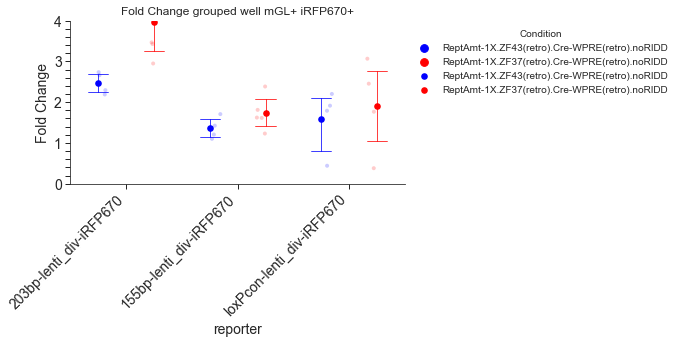

<Figure size 432x288 with 0 Axes>

In [17]:
#Plot summary plot for 1X, double gated 
## Plot just the 1X conditions with no RIDD
#set the hue, hue_order, palette 
repts_iRFP = pd.array(['203bp-lenti_div-iRFP670', '155bp-lenti_div-iRFP670', 'loxPcon-lenti_div-iRFP670'])
hue = 'cond2' 
hue_order = pd.array([
       'ReptAmt-1X.ZF43(retro).Cre-WPRE(retro).noRIDD',
       'ReptAmt-1X.ZF37(retro).Cre-WPRE(retro).noRIDD',
])

palette = {
       'ReptAmt-1X.noZF.noCre.noRIDD': 'grey',
       'ReptAmt-1X.noZF.Cre-WPRE(retro).noRIDD': 'black', 
       'ReptAmt-1X.ZF43(retro).noCre.noRIDD':'deepskyblue',
       'ReptAmt-1X.ZF43(retro).Cre-WPRE(retro).noRIDD':'blue',
       'ReptAmt-1X.ZF37(retro).noCre.noRIDD': 'darksalmon',
       'ReptAmt-1X.ZF37(retro).Cre-WPRE(retro).noRIDD': 'red'}

data_fig = s_normalized[ s_normalized['cond2'].isin(hue_order)]
data_fig = data_fig[ data_fig['reporter'].isin(repts_iRFP)]

#List of stats to plot 
stats_plot = pd.array( ['Fold Change'])
#set plotting parameters 
order = repts_iRFP; palette = palette; hue_order = hue_order; 
x = 'reporter'; hue='cond2'; yscale= 'linear'
ylim = [0,4]  


#Set p-value significance comparisons 
pairs = [
]

xsize =6  ; ysize = 3
fontsize = 14

for stat in stats_plot:
       data_now = data_fig
       y = stat # set the stat to plot
       plottitle = y + ' grouped well mGL+ iRFP670+'
       g = plt.figure(figsize=(xsize,ysize))
       g = summary_plot( x=x, y=y, hue=hue, data=data_now, pairs=pairs, yscale=yscale, 
                     ylim=ylim, fontsize=fontsize,
                     x_rot=45, palette = palette, order=order, hue_order=hue_order, plottitle=plottitle)
       g.figure.savefig(figure_folder + plottitle + '.svg',dpi=300,bbox_inches='tight')

## Summary Plot Fold Changes - no loxPcontrol

10

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

203bp_ReptAmt-1X.ZF37(retro).noCre.noRIDD v.s. 203bp_ReptAmt-1X.ZF37(retro).Cre-WPRE(retro).noRIDD: t-test independent samples, P_val=2.340e-03 stat=-4.383e+00
155bp_ReptAmt-1X.ZF37(retro).noCre.noRIDD v.s. 155bp_ReptAmt-1X.ZF37(retro).Cre-WPRE(retro).noRIDD: t-test independent samples, P_val=4.049e-02 stat=-2.441e+00
155bp_ReptAmt-1X.ZF43(retro).noCre.noRIDD v.s. 155bp_ReptAmt-1X.ZF43(retro).Cre-WPRE(retro).noRIDD: t-test independent samples, P_val=1.823e-01 stat=-1.508e+00
203bp_ReptAmt-1X.ZF43(retro).noCre.noRIDD v.s. 203bp_ReptAmt-1X.ZF43(retro).Cre-WPRE(retro).noRIDD: t-test independent samples, P_val=1.695e-02 stat=-3.274e+00


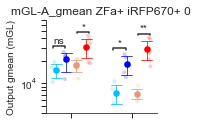

10

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

203bp_ReptAmt-1X.ZF37(retro).noCre.noRIDD v.s. 203bp_ReptAmt-1X.ZF37(retro).Cre-WPRE(retro).noRIDD: t-test independent samples, P_val=2.340e-03 stat=-4.383e+00
155bp_ReptAmt-1X.ZF37(retro).noCre.noRIDD v.s. 155bp_ReptAmt-1X.ZF37(retro).Cre-WPRE(retro).noRIDD: t-test independent samples, P_val=4.049e-02 stat=-2.441e+00


<Figure size 432x288 with 0 Axes>

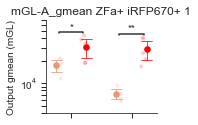

10

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

203bp_ReptAmt-1X.ZF43(retro).noCre.noRIDD v.s. 203bp_ReptAmt-1X.ZF43(retro).Cre-WPRE(retro).noRIDD: t-test independent samples, P_val=1.695e-02 stat=-3.274e+00
155bp_ReptAmt-1X.ZF43(retro).noCre.noRIDD v.s. 155bp_ReptAmt-1X.ZF43(retro).Cre-WPRE(retro).noRIDD: t-test independent samples, P_val=1.823e-01 stat=-1.508e+00


<Figure size 432x288 with 0 Axes>

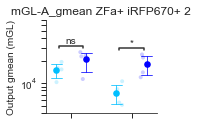

10

<Figure size 432x288 with 0 Axes>

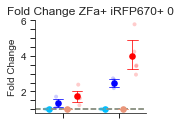

10

<Figure size 432x288 with 0 Axes>

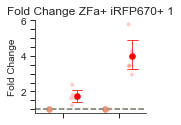

10

<Figure size 432x288 with 0 Axes>

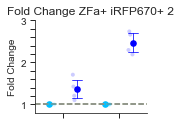

10

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

203bp_ReptAmt-1X.ZF37(retro).noCre.noRIDD v.s. 203bp_ReptAmt-1X.ZF37(retro).Cre-WPRE(retro).noRIDD: t-test independent samples, P_val=3.289e-01 stat=1.040e+00
155bp_ReptAmt-1X.ZF37(retro).noCre.noRIDD v.s. 155bp_ReptAmt-1X.ZF37(retro).Cre-WPRE(retro).noRIDD: t-test independent samples, P_val=3.392e-01 stat=1.016e+00
155bp_ReptAmt-1X.ZF43(retro).noCre.noRIDD v.s. 155bp_ReptAmt-1X.ZF43(retro).Cre-WPRE(retro).noRIDD: t-test independent samples, P_val=7.769e-01 stat=-2.965e-01
203bp_ReptAmt-1X.ZF43(retro).noCre.noRIDD v.s. 203bp_ReptAmt-1X.ZF43(retro).Cre-WPRE(retro).noRIDD: t-test independent samples, P_val=9.463e-01 stat=-7.016e-02


<Figure size 432x288 with 0 Axes>

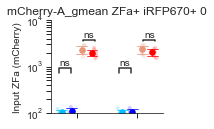

10

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

203bp_ReptAmt-1X.ZF37(retro).noCre.noRIDD v.s. 203bp_ReptAmt-1X.ZF37(retro).Cre-WPRE(retro).noRIDD: t-test independent samples, P_val=3.289e-01 stat=1.040e+00
155bp_ReptAmt-1X.ZF37(retro).noCre.noRIDD v.s. 155bp_ReptAmt-1X.ZF37(retro).Cre-WPRE(retro).noRIDD: t-test independent samples, P_val=3.392e-01 stat=1.016e+00


<Figure size 432x288 with 0 Axes>

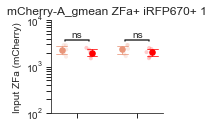

10

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

203bp_ReptAmt-1X.ZF43(retro).noCre.noRIDD v.s. 203bp_ReptAmt-1X.ZF43(retro).Cre-WPRE(retro).noRIDD: t-test independent samples, P_val=9.463e-01 stat=-7.016e-02
155bp_ReptAmt-1X.ZF43(retro).noCre.noRIDD v.s. 155bp_ReptAmt-1X.ZF43(retro).Cre-WPRE(retro).noRIDD: t-test independent samples, P_val=7.769e-01 stat=-2.965e-01


<Figure size 432x288 with 0 Axes>

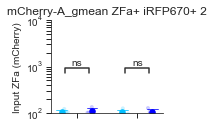

10

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

203bp_ReptAmt-1X.ZF37(retro).noCre.noRIDD v.s. 203bp_ReptAmt-1X.ZF37(retro).Cre-WPRE(retro).noRIDD: t-test independent samples, P_val=6.148e-01 stat=-5.235e-01
155bp_ReptAmt-1X.ZF37(retro).noCre.noRIDD v.s. 155bp_ReptAmt-1X.ZF37(retro).Cre-WPRE(retro).noRIDD: t-test independent samples, P_val=3.275e-01 stat=-1.043e+00
155bp_ReptAmt-1X.ZF43(retro).noCre.noRIDD v.s. 155bp_ReptAmt-1X.ZF43(retro).Cre-WPRE(retro).noRIDD: t-test independent samples, P_val=3.106e-01 stat=1.107e+00
203bp_ReptAmt-1X.ZF43(retro).noCre.noRIDD v.s. 203bp_ReptAmt-1X.ZF43(retro).Cre-WPRE(retro).noRIDD: t-test independent samples, P_val=2.463e-01 stat=1.285e+00


<Figure size 432x288 with 0 Axes>

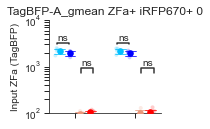

10

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

203bp_ReptAmt-1X.ZF37(retro).noCre.noRIDD v.s. 203bp_ReptAmt-1X.ZF37(retro).Cre-WPRE(retro).noRIDD: t-test independent samples, P_val=6.148e-01 stat=-5.235e-01
155bp_ReptAmt-1X.ZF37(retro).noCre.noRIDD v.s. 155bp_ReptAmt-1X.ZF37(retro).Cre-WPRE(retro).noRIDD: t-test independent samples, P_val=3.275e-01 stat=-1.043e+00


<Figure size 432x288 with 0 Axes>

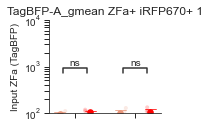

10

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

203bp_ReptAmt-1X.ZF43(retro).noCre.noRIDD v.s. 203bp_ReptAmt-1X.ZF43(retro).Cre-WPRE(retro).noRIDD: t-test independent samples, P_val=2.463e-01 stat=1.285e+00
155bp_ReptAmt-1X.ZF43(retro).noCre.noRIDD v.s. 155bp_ReptAmt-1X.ZF43(retro).Cre-WPRE(retro).noRIDD: t-test independent samples, P_val=3.106e-01 stat=1.107e+00


<Figure size 432x288 with 0 Axes>

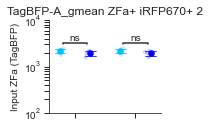

<Figure size 432x288 with 0 Axes>

In [19]:
#Plot summary plot for 1X, double gated 
## Plot just the 1X conditions with no RIDD
#set the hue, hue_order, palette 
repts_iRFP = pd.array(['203bp-lenti_div-iRFP670', '155bp-lenti_div-iRFP670'])
hue = 'cond2' 
hue_order = pd.array([
       'ReptAmt-1X.ZF43(retro).noCre.noRIDD',
       'ReptAmt-1X.ZF43(retro).Cre-WPRE(retro).noRIDD',
      'ReptAmt-1X.ZF37(retro).noCre.noRIDD',
       'ReptAmt-1X.ZF37(retro).Cre-WPRE(retro).noRIDD'
])

hue_order37 = pd.array([
      'ReptAmt-1X.ZF37(retro).noCre.noRIDD',
       'ReptAmt-1X.ZF37(retro).Cre-WPRE(retro).noRIDD'
])

hue_order43 = pd.array([
       'ReptAmt-1X.ZF43(retro).noCre.noRIDD',
       'ReptAmt-1X.ZF43(retro).Cre-WPRE(retro).noRIDD',
])

hueorders = [hue_order, hue_order37, hue_order43]

palette = {
       'ReptAmt-1X.noZF.noCre.noRIDD': 'grey',
       'ReptAmt-1X.noZF.Cre-WPRE(retro).noRIDD': 'black', 
       'ReptAmt-1X.ZF43(retro).noCre.noRIDD':'deepskyblue',
       'ReptAmt-1X.ZF43(retro).Cre-WPRE(retro).noRIDD':'blue',
       'ReptAmt-1X.ZF37(retro).noCre.noRIDD': 'darksalmon',
       'ReptAmt-1X.ZF37(retro).Cre-WPRE(retro).noRIDD': 'red'}



#List of stats to plot 
stats_plot = pd.array( ['mGL-A_gmean', 'Fold Change', 'mCherry-A_gmean', 'TagBFP-A_gmean'])
#set plotting parameters 
order = ['155bp', '203bp']; palette = palette; hue_order = hue_order; 
x = 'Rept'; hue='cond2'; yscale= 'linear'
ylims ={'Fold Change': pd.array([[0.8,6], [0.8,6], [0.8,3]]),
        'mGL-A_gmean': [4e3, 7e4],
        'mCherry-A_gmean': [1e2, 1e4],
        'TagBFP-A_gmean': [1e2, 1e4]}
ylabels ={'Fold Change': 'Fold Change',  
        'mGL-A_gmean': 'Output gmean (mGL)',
        'TagBFP-A_gmean': 'Input ZFa (TagBFP)',
        'mCherry-A_gmean': 'Input ZFa (mCherry)'}
yscales ={'Fold Change': 'linear',  
        'mGL-A_gmean': 'log',
        'mCherry-A_gmean': 'log',
        'TagBFP-A_gmean': 'log'}


#Set p-value significance comparisons 
pairs_mGL_gmean = [ 
       [('203bp', 'ReptAmt-1X.ZF43(retro).noCre.noRIDD'), ('203bp', 'ReptAmt-1X.ZF43(retro).Cre-WPRE(retro).noRIDD')], 
        [('203bp', 'ReptAmt-1X.ZF37(retro).noCre.noRIDD'), ('203bp','ReptAmt-1X.ZF37(retro).Cre-WPRE(retro).noRIDD')],
               [('155bp', 'ReptAmt-1X.ZF43(retro).noCre.noRIDD'), ('155bp', 'ReptAmt-1X.ZF43(retro).Cre-WPRE(retro).noRIDD')], 
        [('155bp', 'ReptAmt-1X.ZF37(retro).noCre.noRIDD'), ('155bp','ReptAmt-1X.ZF37(retro).Cre-WPRE(retro).noRIDD')]
        ]
pairs_ZF37 = [ 
        [('203bp', 'ReptAmt-1X.ZF37(retro).noCre.noRIDD'), ('203bp','ReptAmt-1X.ZF37(retro).Cre-WPRE(retro).noRIDD')],
       [('155bp', 'ReptAmt-1X.ZF37(retro).noCre.noRIDD'), ('155bp','ReptAmt-1X.ZF37(retro).Cre-WPRE(retro).noRIDD')]
        ]
pairs_ZF43 = [ 
       [('203bp', 'ReptAmt-1X.ZF43(retro).noCre.noRIDD'), ('203bp', 'ReptAmt-1X.ZF43(retro).Cre-WPRE(retro).noRIDD')], 
               [('155bp', 'ReptAmt-1X.ZF43(retro).noCre.noRIDD'), ('155bp', 'ReptAmt-1X.ZF43(retro).Cre-WPRE(retro).noRIDD')], 
        ]
pairss = [pairs_mGL_gmean, pairs_ZF37,pairs_ZF43 ]

#[6,2.3]
xsize =2; ysize = 1.7
fontsize = 10
xlabel = ''

for y in stats_plot:
       for i in range(len(hueorders)):
              ylim = ylims[y]
              if y == 'Fold Change':
                     ylim = ylim[i]
              pairs = [] #reset pairs
              if (y != 'Fold Change'):
                     pairs = pairss[i]
              ylabel = ylabels[y]
              hue_order = hueorders[i]
              data_fig = s_normalized[ s_normalized['cond2'].isin(hue_order)]
              data_fig = data_fig[ data_fig['reporter'].isin(repts_iRFP)]
              data_now = data_fig
              yscale = yscales[y]

              # if you track it above, this is gated on ZFa+ 
              plottitle = y + ' ZFa+ iRFP670+ ' + str(i)
              g = plt.figure(figsize=(xsize,ysize))
              plt.axhline(y=1, ls='--', color='#C3DB9A')
              plt.axhline(y=1, ls='--', color='gray')
              display(fontsize)
              g = summary_plot( x=x, y=y, hue=hue, data=data_now, pairs=pairs, yscale=yscale, ylabel=ylabel,
                            ylim=ylim, fontsize=fontsize, xlabel = '', xticklabels=False, legend=False,
                            x_rot=45, palette = palette, order=order, hue_order=hue_order, plottitle=plottitle)
              g.figure.savefig(figure_folder + plottitle + '.svg',dpi=300,bbox_inches='tight')

data_save = s_normalized[s_normalized['reporter'].isin(repts_iRFP)]
s_normalized.to_excel('Fig5_S22_MEFS.xlsx',index=False) 
s_normalized.to_excel('Fig5_S22_MEFS_203_155.xlsx',index=False) 